# **Part 1: Exploratory Data Analysis**

## **Importing data**

In [1]:
# Import necessary Libraries
import math
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import seaborn as sb
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import boxcox
from scipy.stats import pointbiserialr, spearmanr
from scipy.stats import shapiro
from tabulate import tabulate
from shapely import wkt
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.display import HTML


# Download datasets: https://drive.google.com/drive/folders/1mfdE27GETO7xRW1qg8RLoi-TK7Or4ZZc

In [2]:
# Upload the Final_Final_Final
food = pd.read_csv('/content/final_final_final_dataset.csv')
food.rename(columns={'2022': 'Inflation'}, inplace=True)
food['Geometry'] = food['Geometry'].apply(wkt.loads)
food.rename(columns={'Geometry': 'geometry'}, inplace=True)
print(food.columns)
food

Index(['Country', 'Conflict', 'Overall score', 'United States',
       'United Kingdom', 'Germany', 'China', 'Netherlands', 'France', 'Canada',
       'Japan', 'Belgium', 'Italy', 'Shortest_Distance', 'Closest Country',
       'Weighted Average', 'Market Access', 'income_L', 'income_UM',
       'income_LM', 'income_H', 'Inflation', 'geometry', 'Conflict Flag',
       'Market Access Nearest'],
      dtype='object')


Country  Conflict  Overall score  United States  United Kingdom  \
0          Algeria        10           58.9    9524.101077     2925.728564   
1           Angola        19           43.7   14038.882323     7635.723037   
2        Argentina         0           64.8   10187.205076    11598.860261   
3        Australia         0           75.4   13768.869139    15316.436936   
4          Austria         0           78.1    8416.281815     1394.152865   
..             ...       ...            ...            ...             ...   
102  United States         1           78.0       0.000000     7086.076100   
103        Uruguay         0           71.8   10411.242961    10925.884854   
104     Uzbekistan         0           57.5   10282.105793     4911.217109   
105        Vietnam         0           67.9   12060.623838     9703.596732   
106         Zambia         0           43.5   14850.578819     8057.521610   

          Germany         China   Netherlands        France        Canada  \
0     2633.681183   9088.895760   2668.393961   1634.883790   7838.637705   
1     7083.610259  10492.894760   7254.131482   6402.332434  12565.676033   
2    12102.410193  19017.557742  11871.849796  10703.401522  11167.652101   
3    14558.447947   7635.130076  14885.373916  15724.754872  14449.705300   
4      476.333500   7086.593311    809.859929   1455.889396   6487.692311   
..            ...           ...           ...           ...           ...   
102   7940.247105  10172.141735   7629.163284   8028.814127   1971.140270   
103  11357.375204  18129.457223  11151.542961   9951.000190  11144.626952   
104   4080.774437   3522.446741   4420.375349   5304.641611   8425.331933   
105   8978.210114   2227.995224   9288.195990  10259.310337  11069.748139   
106   7375.028546   9691.653214   7603.278370   6930.061828  13187.152395   

     ...  Weighted Average  Market Access  income_L  income_UM income_LM  \
0    ...       5958.210208     111.328629       0.0        0.0       1.0   
1    ...      10089.417624      46.332039       0.0        0.0       1.0   
2    ...      12305.199332      35.726990       0.0        1.0       0.0   
3    ...      13448.413965      33.517659       0.0        0.0       0.0   
4    ...       4466.288138     290.224170       0.0        0.0       0.0   
..   ...               ...            ...       ...        ...       ...   
102  ...       5492.892791     747.551156       0.0        0.0       0.0   
103  ...      11967.155149      36.747703       0.0        0.0       0.0   
104  ...       6415.239797      76.572794       0.0        0.0       1.0   
105  ...       9254.414222      59.102038       0.0        0.0       1.0   
106  ...      10416.386168      44.658781       0.0        0.0       1.0   

     income_H  Inflation                                           geometry  \
0         0.0  12.701900  POLYGON ((-4.821613117999902 24.99506459600009...   
1         0.0  22.870395  MULTIPOLYGON (((13.073702840000067 -4.63532318...   
2         0.0  74.630560  MULTIPOLYGON (((-67.19390417499997 -22.8222234...   
3         1.0   8.166700  MULTIPOLYGON (((131.53589928500003 -31.6055640...   
4         1.0  10.748240  POLYGON ((16.945042766000142 48.60416615800007...   
..        ...        ...                                                ...   
102       1.0  11.438880  MULTIPOLYGON (((-122.75301682799991 48.9925145...   
103       1.0  10.593382  POLYGON ((-57.602792548565105 -30.190516953885...   
104       0.0  15.046252  MULTIPOLYGON (((71.7855196540001 39.9897048950...   
105       0.0   2.413387  MULTIPOLYGON (((107.52039270000006 14.70458160...   
106       0.0  12.847919  POLYGON ((32.9208634850001 -9.407900085999913,...   

     Conflict Flag  Market Access Nearest  
0                0              19.130555  
1                0               2.973166  
2                0              11.253922  
3                0               4.045709  
4                0              95.236714  
..             ...     

## **Exploratory Data Analysis (Old, DONT CHECK THIS ANYMORE)**

#### **Summary Statistics**

In [3]:
continuous_vars = [
    "Overall score",
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",         # This is the column for the year 2022
    "Conflict"
]

binary_vars = [
    "income_L",
    "income_UM",
    "income_LM",
    "income_H",
    "Conflict Flag"
]

In [4]:
# # RAW VERSION
# # Loop over continuous variables and print their summary statistics
# print("CONTINUOUS VARIABLES SUMMARY\n" + "="*35)
# for col in continuous_vars:
#     print(f"Summary Statistics for {col}:")
#     print(food[col].describe())  # Using describe() for continuous stats
#     print()  # Blank line for readability

# # Loop over binary variables and print their summary statistics,
# # plus, also print the value counts to see the distribution of True/False (or 1/0)
# print("\nBINARY VARIABLES (Counts)\n" + "="*35)
# for col in binary_vars:
#     true_count = food[col].sum()  # Count of True/1
#     total_count = food[col].count()  # Total non-null values
#     false_count = total_count - true_count  # Count of False/0

#     print(f"Binary variable {col}:")
#     print(f"  Count of True/1: {true_count}")
#     print(f"  Count of False/0: {false_count}")
#     print()

In [5]:
# SLIGHTLY NICER VERSION
print("\nCONTINUOUS VARIABLES SUMMARY")
print("=" * 40)
for col in continuous_vars:
    stats = food[col].describe().reset_index()
    print(f"Summary Statistics for {col}:")
    print(tabulate(stats, headers=["Statistic", "Value"], tablefmt="pretty"))
    print("\n")

print("\nBINARY VARIABLES SUMMARY")
print("=" * 40)
for col in binary_vars:
    stats = food[col].describe().reset_index()
    #print(f"Summary Statistics for {col}:")
    #print(tabulate(stats, headers=["Statistic", "Value"], tablefmt="pretty"))
    print(f"Value Counts for {col}:")
    print(tabulate(food[col].value_counts().reset_index().rename(columns={"index": "Value", col: "Count"}), headers="keys", tablefmt="pretty"))
    print("\n")


CONTINUOUS VARIABLES SUMMARY
Summary Statistics for Overall score:
+---+-----------+--------------------+
|   | Statistic |       Value        |
+---+-----------+--------------------+
| 0 |   count   |       107.0        |
| 1 |   mean    |  62.9373831775701  |
| 2 |    std    | 12.241774468770558 |
| 3 |    min    |        38.5        |
| 4 |    25%    |        52.8        |
| 5 |    50%    |        64.5        |
| 6 |    75%    |       73.55        |
| 7 |    max    |        83.7        |
+---+-----------+--------------------+


Summary Statistics for Shortest_Distance:
+---+-----------+--------------------+
|   | Statistic |       Value        |
+---+-----------+--------------------+
| 0 |   count   |       107.0        |
| 1 |   mean    | 3384.0579789647186 |
| 2 |    std    | 2558.5772166187153 |
| 3 |    min    |        0.0         |
| 4 |    25%    | 1289.3971045594162 |
| 5 |    50%    | 3271.836120719412  |
| 6 |    75%    | 4675.684089797902  |
| 7 |    max    | 10187.205076

#### **Histograms and Bars**

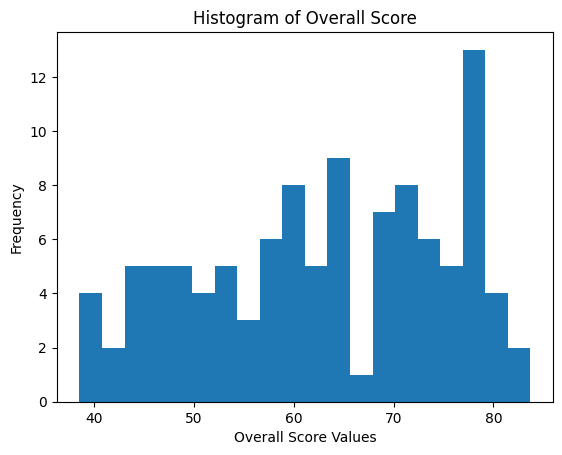

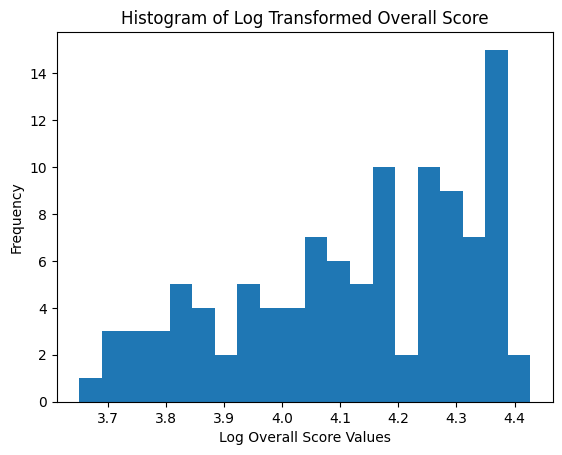

Optimal Lambda for Box-Cox Transformation (Overall Score): 1.4738154081807884


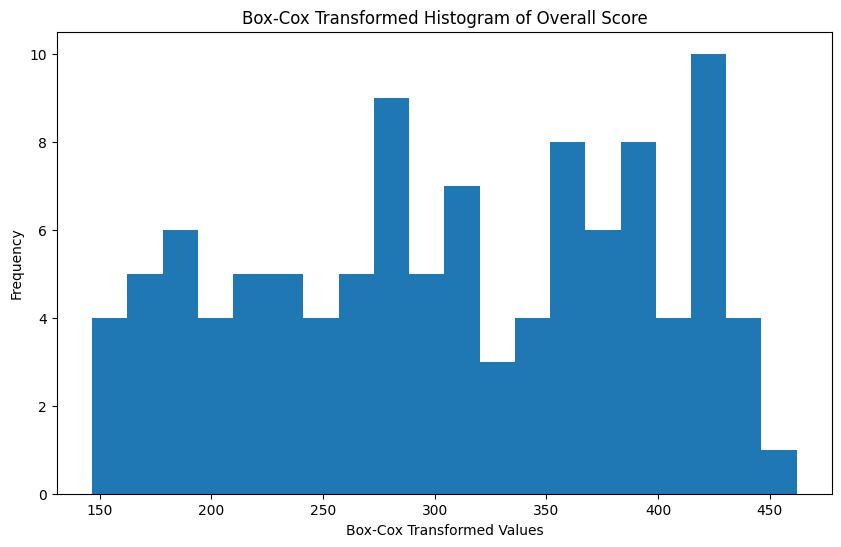

In [6]:
# Overall Score
plt.hist(food['Overall score'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Overall Score")
plt.xlabel("Overall Score Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Overall score']), bins=20)  # Adjust bins as needed
plt.title("Histogram of Log Transformed Overall Score")
plt.xlabel("Log Overall Score Values")
plt.ylabel("Frequency")
plt.show()

# BoxCox
filtered_non_zero = food['Overall score'][food['Overall score'] > 0]
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Overall Score): {best_lambda}")

# Plot Box-Cox transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='#1f77b4')  # You can customize the color
plt.title("Box-Cox Transformed Histogram of Overall Score")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()

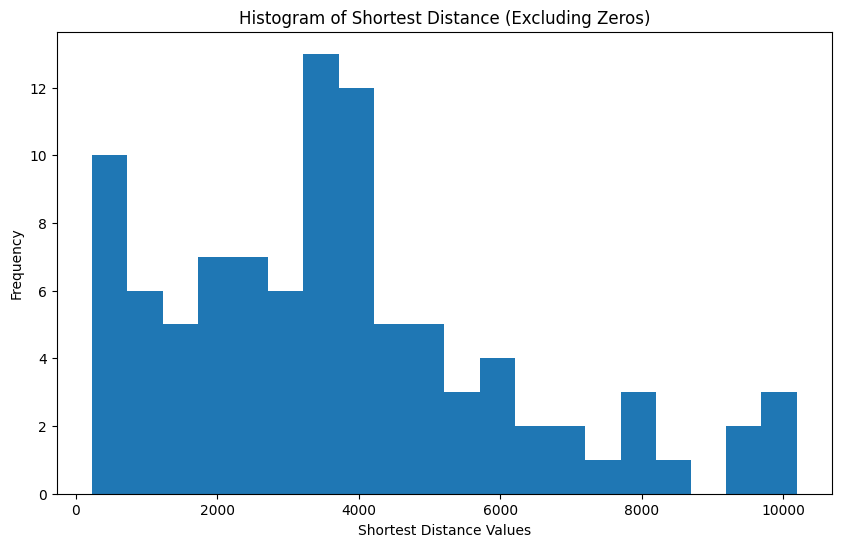

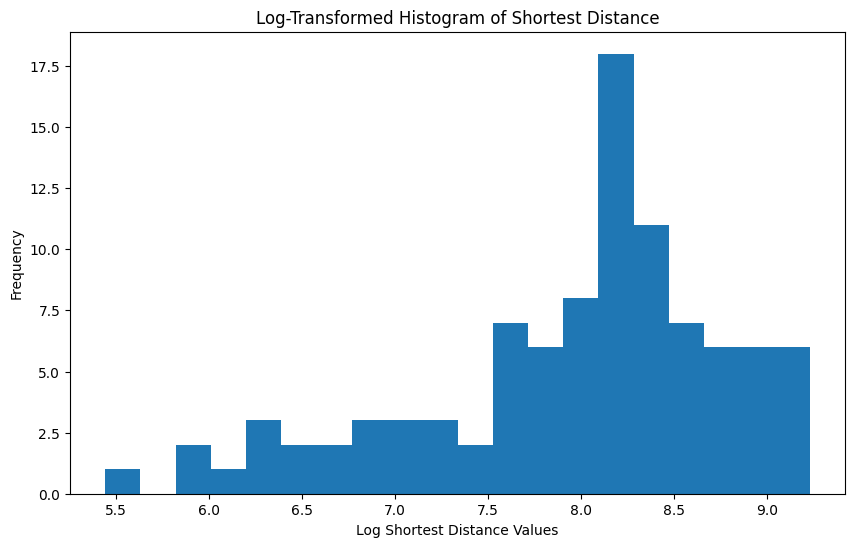

Optimal Lambda for Box-Cox Transformation (Shortest Distance): 0.4467125799937547


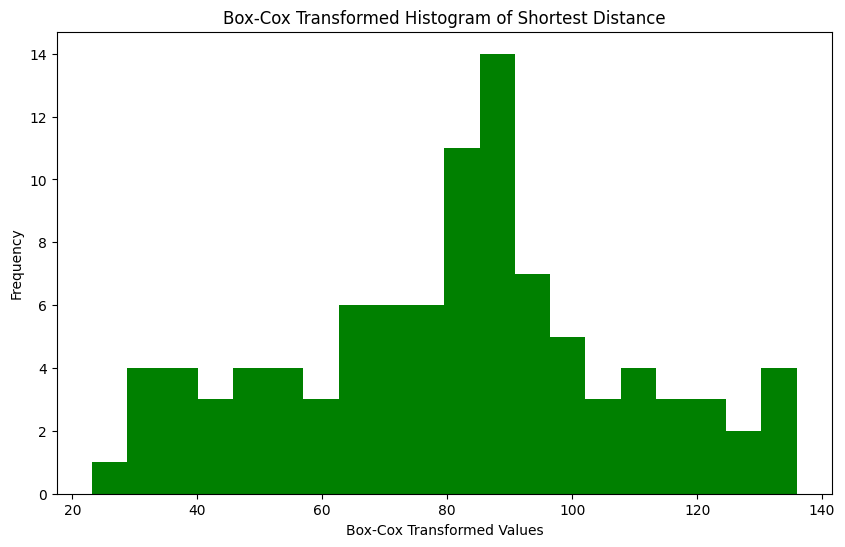

In [7]:
# SHORTEST DISTANCE
# Filter data to remove NaNs and exclude zeros for Box-Cox
filtered_data = food['Shortest_Distance'].dropna()
filtered_non_zero = filtered_data[filtered_data > 0]

# Raw histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_non_zero, bins=20, color='#1f77b4')
plt.title("Histogram of Shortest Distance (Excluding Zeros)")
plt.xlabel("Shortest Distance Values")
plt.ylabel("Frequency")
plt.show()

# Log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log(filtered_non_zero + 1), bins=20, color='#1f77b4')
plt.title("Log-Transformed Histogram of Shortest Distance")
plt.xlabel("Log Shortest Distance Values")
plt.ylabel("Frequency")
plt.show()

# Box-Cox transformed histogram
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Shortest Distance): {best_lambda}")
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='green')
plt.title("Box-Cox Transformed Histogram of Shortest Distance")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()


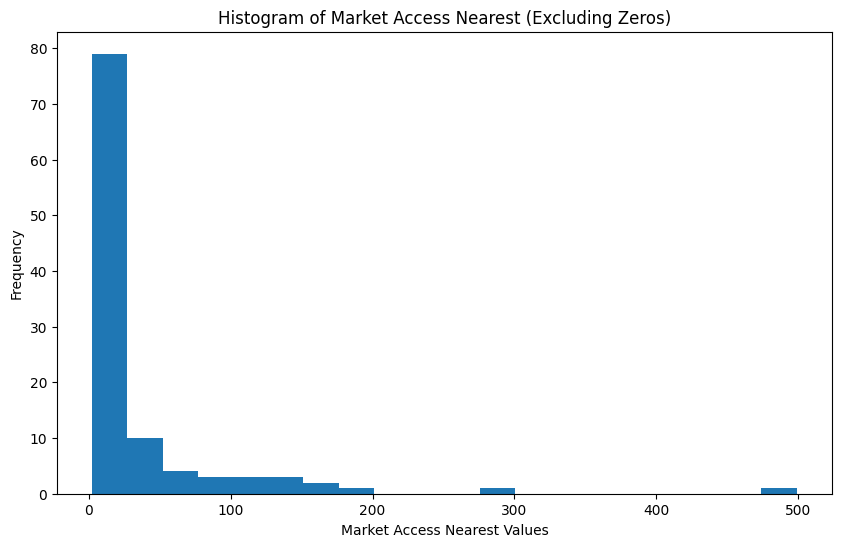

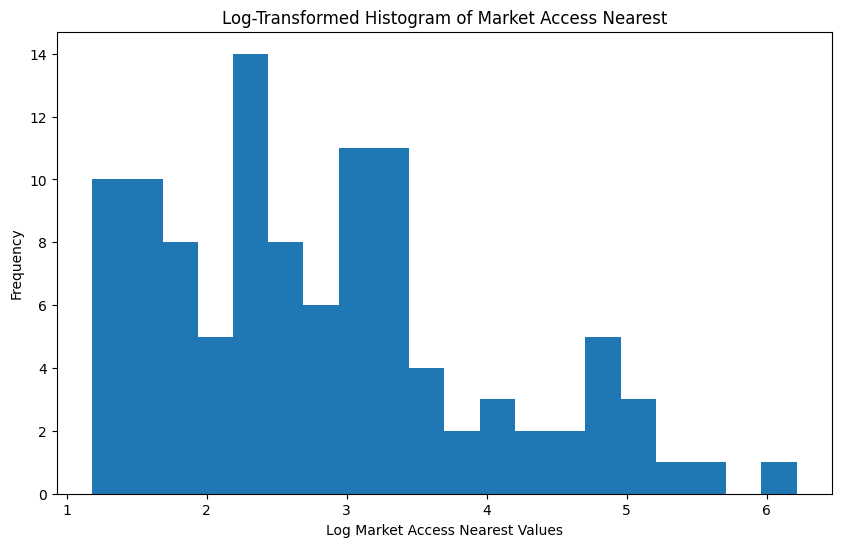

Optimal Lambda for Box-Cox Transformation (Market Access Nearest): -0.22322432230605263


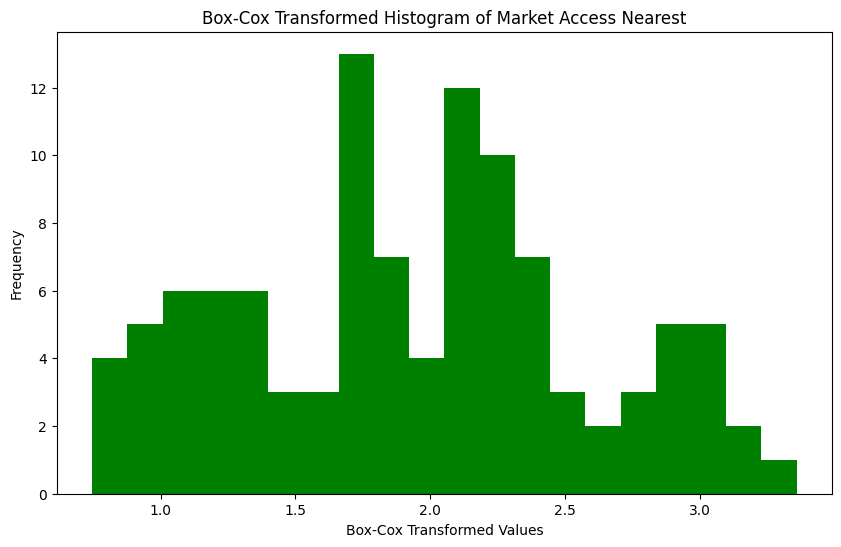

In [8]:
# SHORTEST DISTANCE MARKET ACCESSS
# Filter data to remove NaNs and exclude zeros for Box-Cox
filtered_data = food['Market Access Nearest'].dropna()
filtered_non_zero = filtered_data[filtered_data > 0]

# Raw histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_non_zero, bins=20, color='#1f77b4')
plt.title("Histogram of Market Access Nearest (Excluding Zeros)")
plt.xlabel("Market Access Nearest Values")
plt.ylabel("Frequency")
plt.show()

# Log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log(filtered_non_zero + 1), bins=20, color='#1f77b4')
plt.title("Log-Transformed Histogram of Market Access Nearest")
plt.xlabel("Log Market Access Nearest Values")
plt.ylabel("Frequency")
plt.show()

# Box-Cox transformed histogram
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Market Access Nearest): {best_lambda}")
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='green')
plt.title("Box-Cox Transformed Histogram of Market Access Nearest")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()

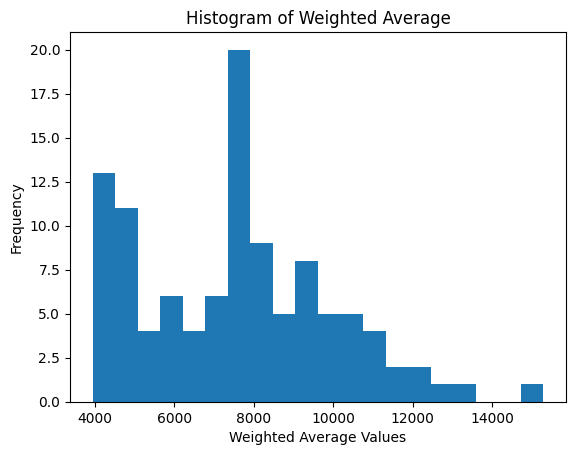

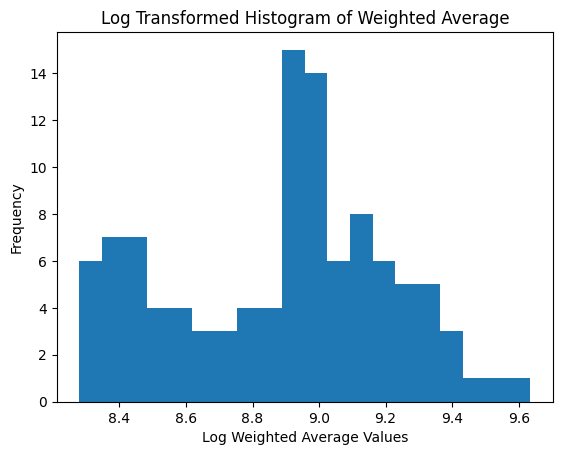

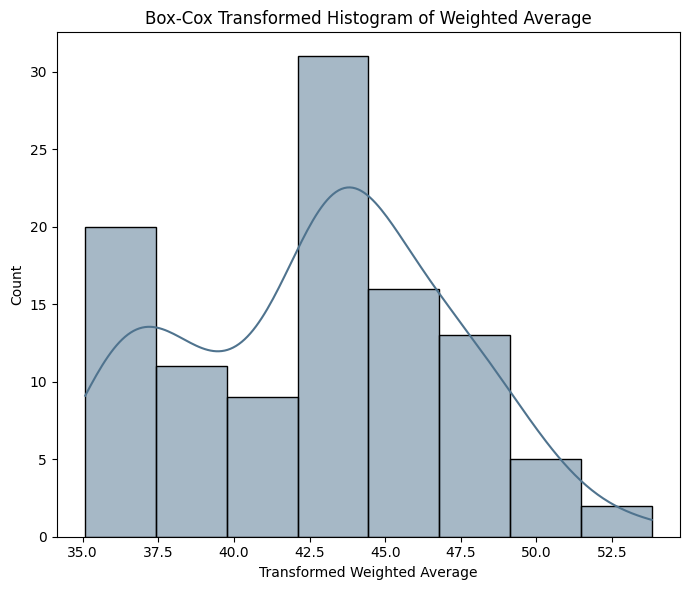

In [9]:
# WEIGHTED AVERAGE OF HAVERSINE DISTANCES
# Plot Weighted Average
plt.hist(food['Weighted Average'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Weighted Average")
plt.xlabel("Weighted Average Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Weighted Average']), bins=20)  # Adjust bins as needed
plt.title("Log Transformed Histogram of Weighted Average")
plt.xlabel("Log Weighted Average Values")
plt.ylabel("Frequency")
plt.show()

# Plot BoxCox Transformation
transformed_data, best_lambda = boxcox(food['Weighted Average'])

# Visualize the original and the Box-Cox transformed distributions
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sb.histplot(transformed_data, kde=True, ax=ax, color='#4f738e')
ax.set_title("Box-Cox Transformed Histogram of Weighted Average")
ax.set_xlabel("Transformed Weighted Average")
plt.tight_layout()
plt.show()

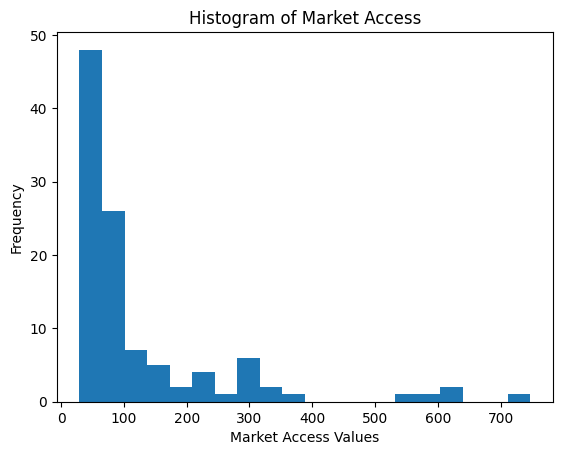

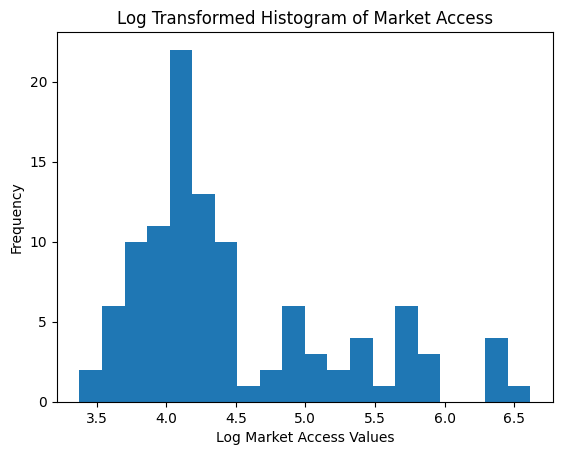

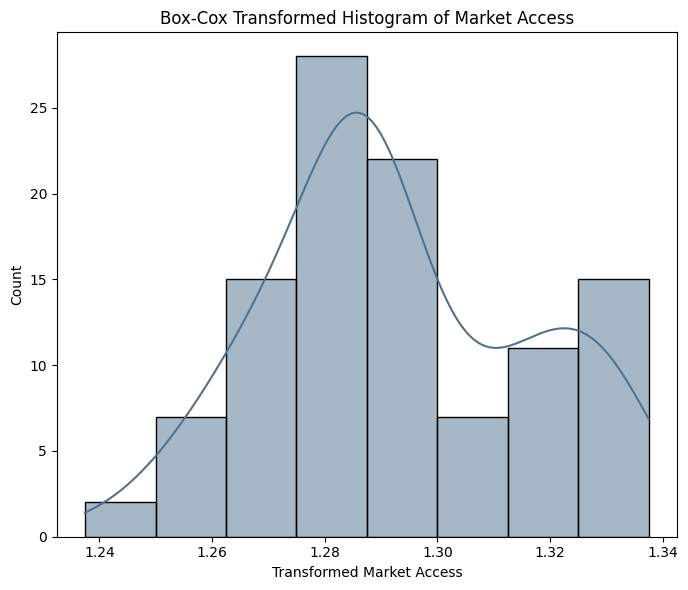

In [10]:
# MARKET ACCESS TRANSFORMATION
# Plot Weighted Average
plt.hist(food['Market Access'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Market Access")
plt.xlabel("Market Access Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Market Access']), bins=20)  # Adjust bins as needed
plt.title("Log Transformed Histogram of Market Access")
plt.xlabel("Log Market Access Values")
plt.ylabel("Frequency")
plt.show()

# Plot BoxCox Transformation
transformed_data, best_lambda = boxcox(food['Market Access'])

# Visualize the original and the Box-Cox transformed distributions
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sb.histplot(transformed_data, kde=True, ax=ax, color='#4f738e')
ax.set_title("Box-Cox Transformed Histogram of Market Access")
ax.set_xlabel("Transformed Market Access")
plt.tight_layout()
plt.show()

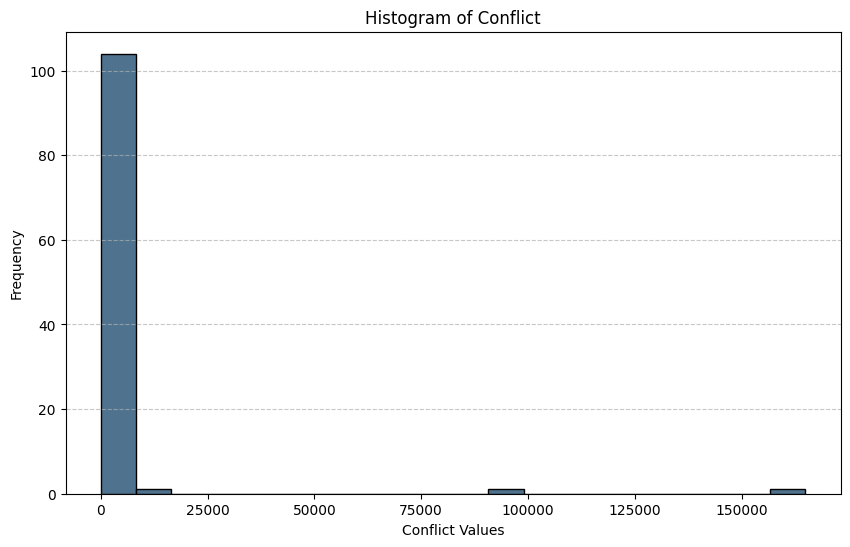

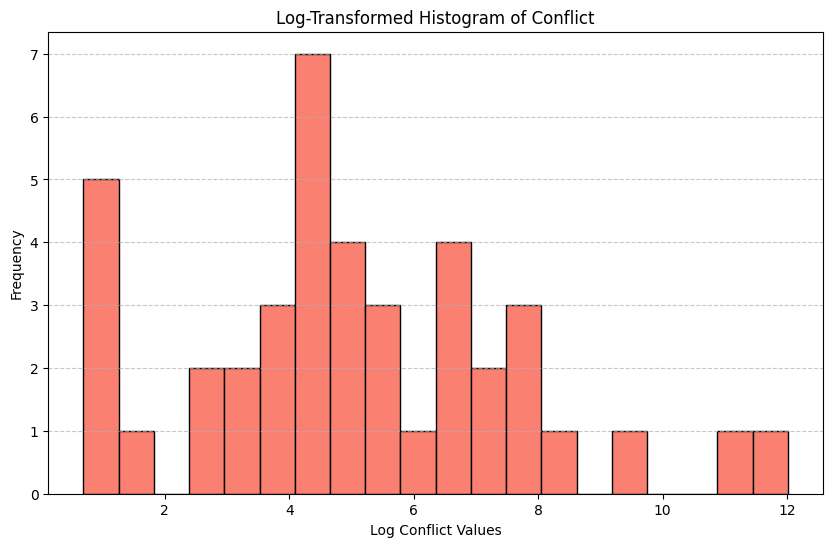

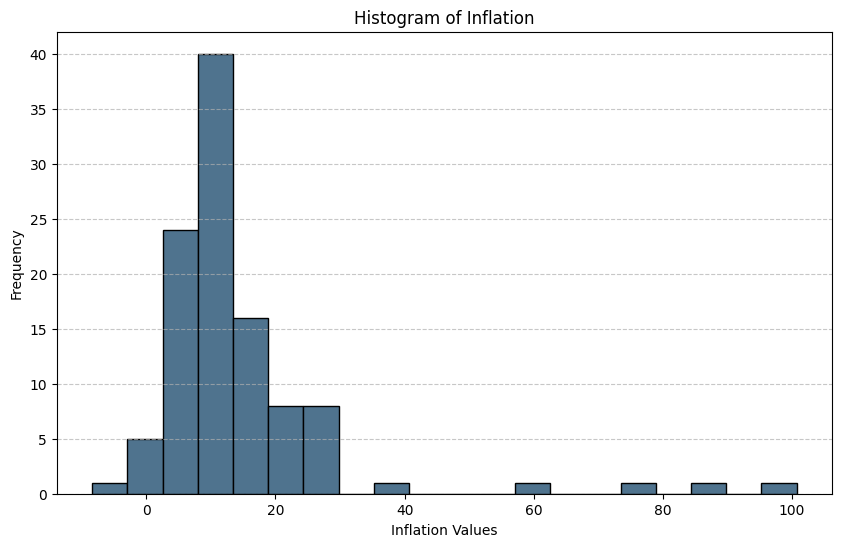

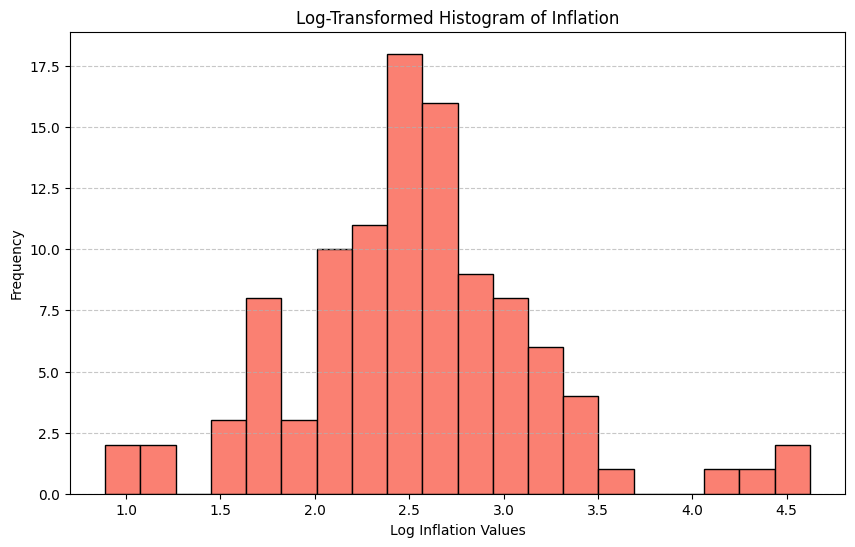

In [11]:
# CONFLICT AND INFLATION
# ALTHOUGH CONFLICT WE ARE JUST USING IT AS BINARY VARIABLE BUT WHO KNOWS ALRIGHT
# Columns to plot
columns_to_plot = ['Conflict', 'Inflation']

# Loop through each column
for col in columns_to_plot:
    # Filter out NaN values
    filtered_data = food[col].dropna()

    # Raw histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_data, bins=20, color='#4f738e', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col} Values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Log-transformed histogram (filter for positive values only)
    positive_data = filtered_data[filtered_data > 0]  # Log requires strictly positive values
    plt.figure(figsize=(10, 6))
    plt.hist(np.log(positive_data + 1), bins=20, color='salmon', edgecolor='black')
    plt.title(f"Log-Transformed Histogram of {col}")
    plt.xlabel(f"Log {col} Values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

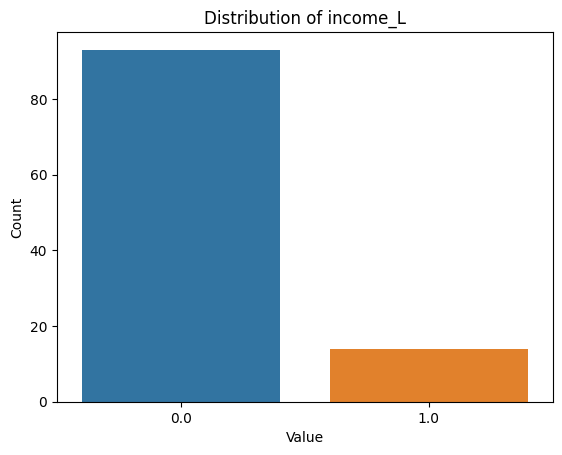

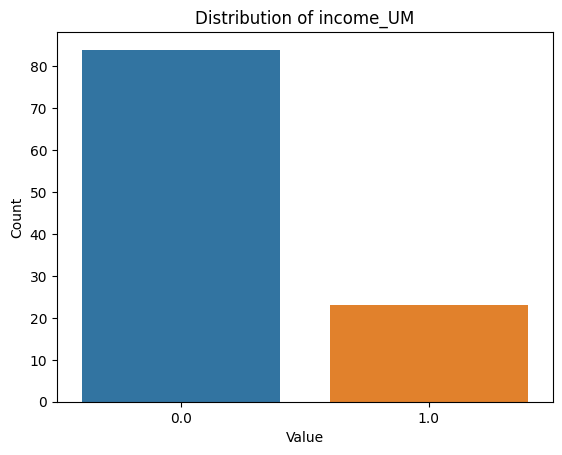

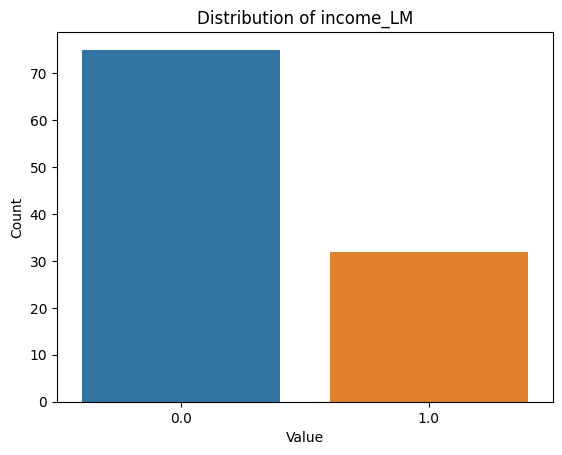

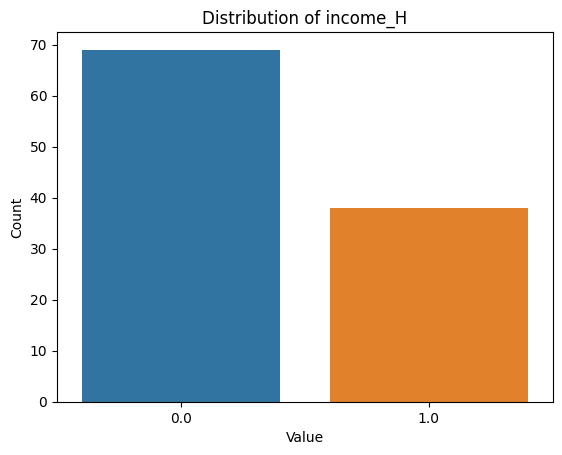

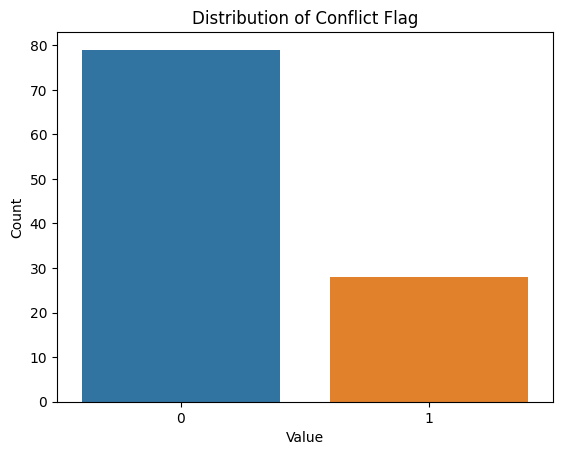

In [12]:
# BINARY VARIABLES BART CHARTS
for col in binary_vars:
    value_counts = food[col].value_counts()
    sb.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='tab10', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()


### **Scatter Plots**
- Note: Market Acess Linear transformation could be sqrt(x)

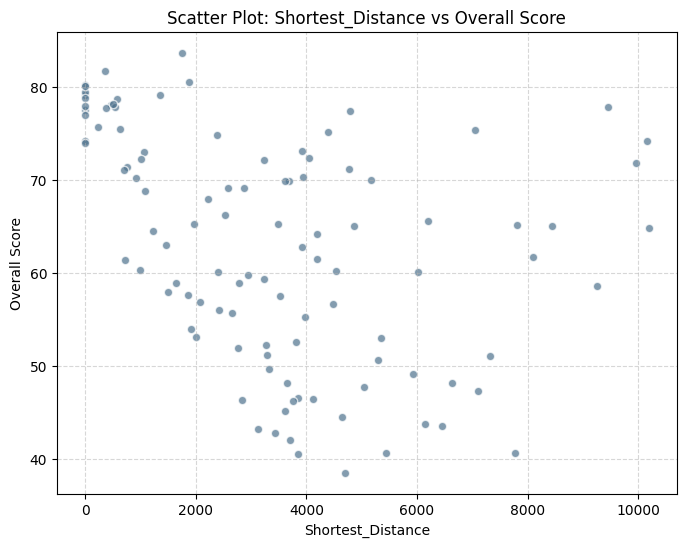

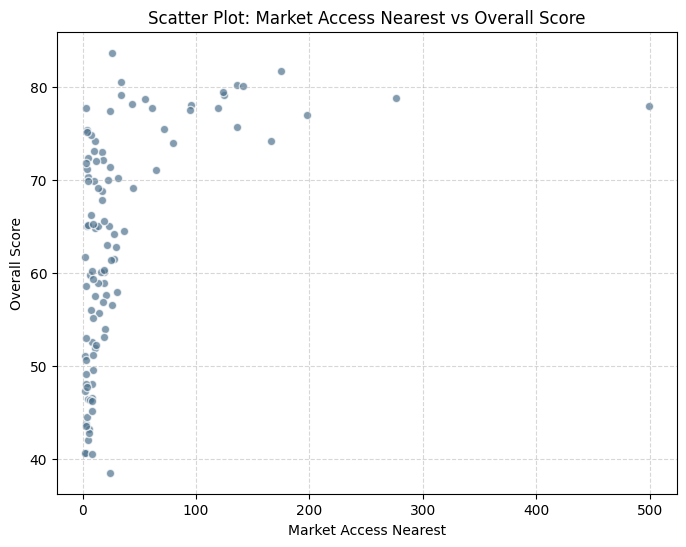

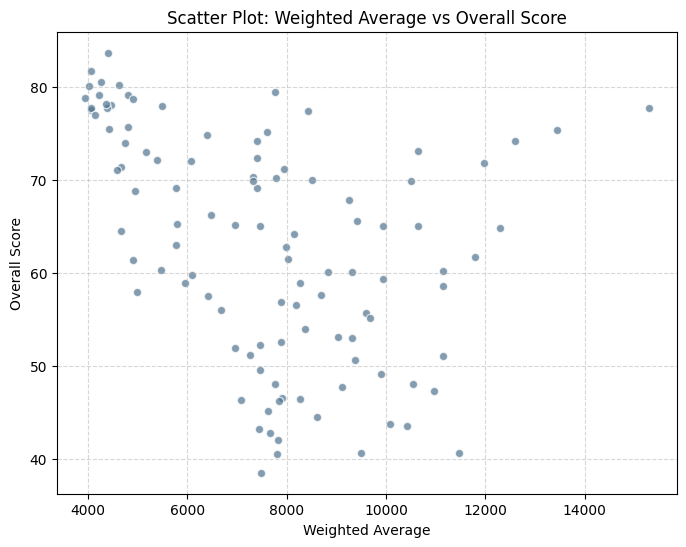

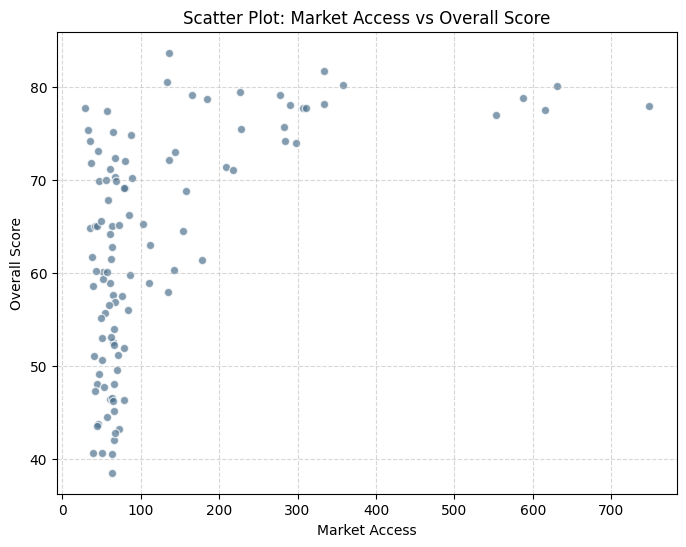

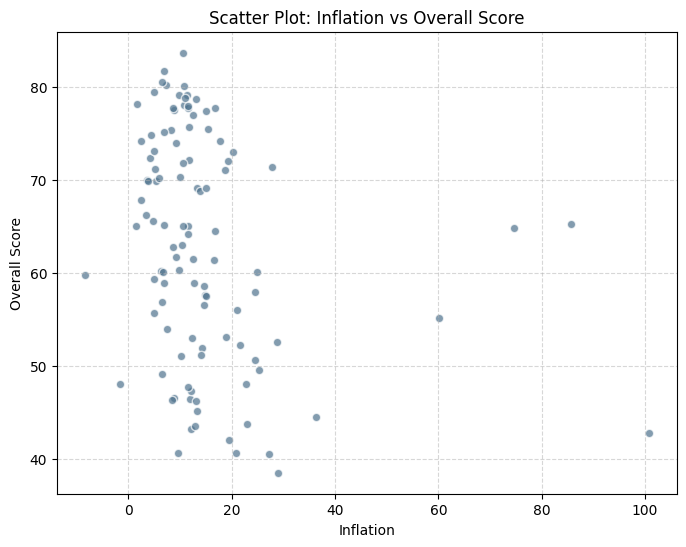

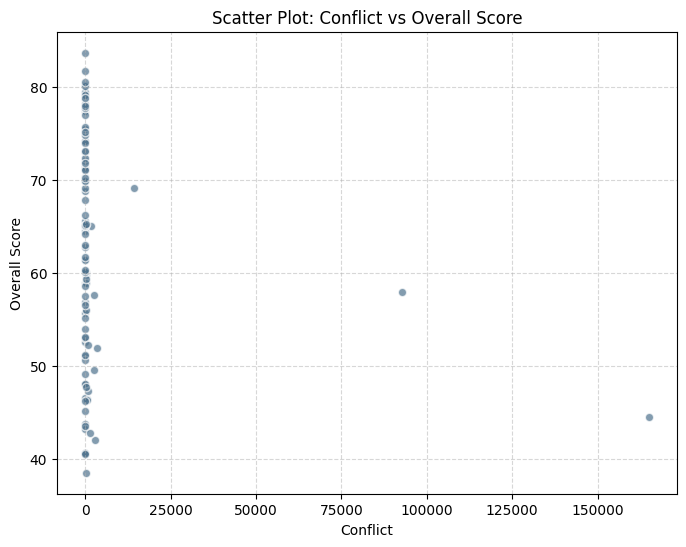

In [13]:
# OVERALL FOOD SECURITY SCORE TO:
continuous_vars = [
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",
    "Conflict"
]

# Loop through the list and plot scatter plots
for col in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(food[col], food['Overall score'], alpha=0.7, edgecolor='w', color='#4f738e')
    plt.title(f"Scatter Plot: {col} vs Overall Score")
    plt.xlabel(col)
    plt.ylabel("Overall Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

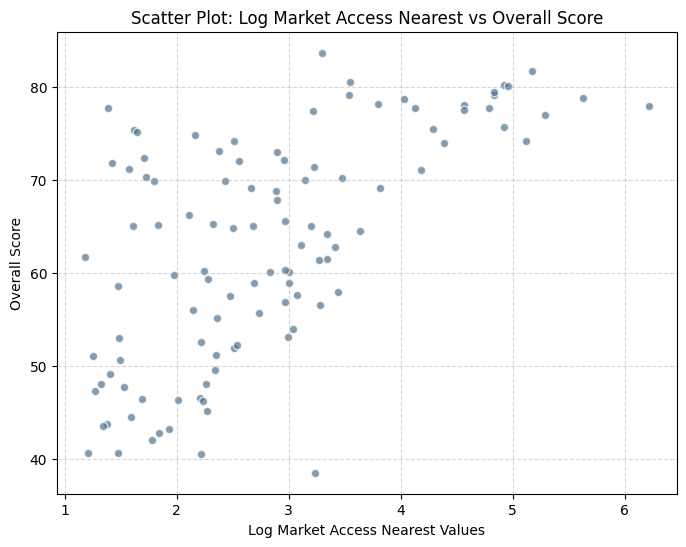

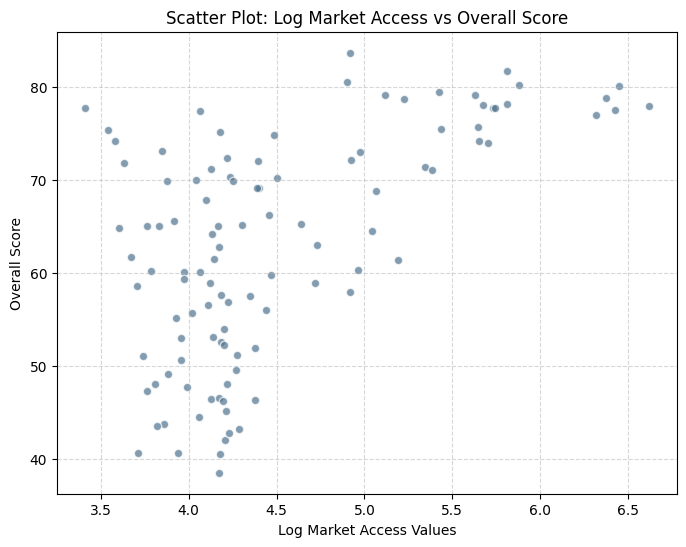

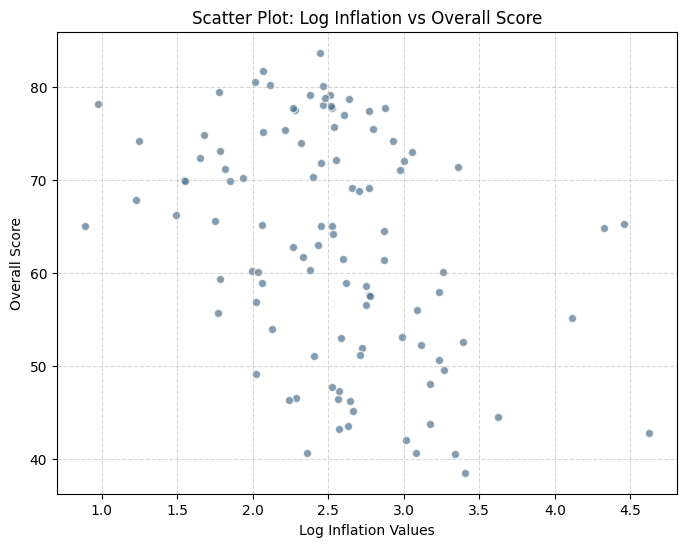

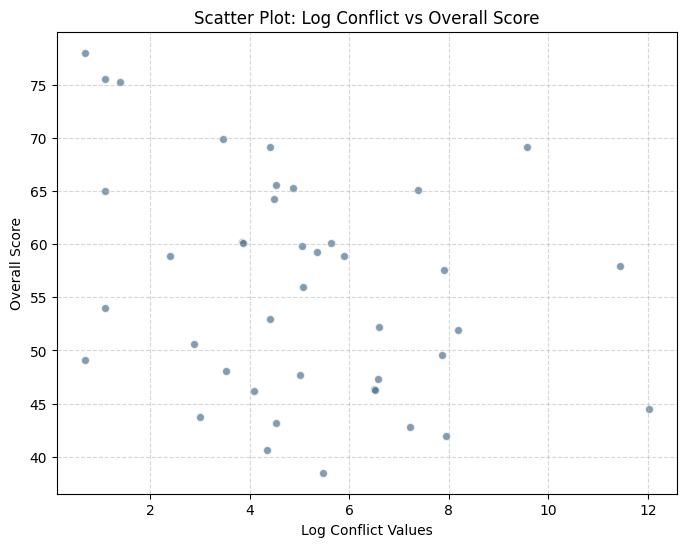

In [14]:
# LOG VERSION OF SCATTERPLOT
continuous_vars = [
    #"Shortest_Distance",
    "Market Access Nearest",
    #"Weighted Average",
    "Market Access",
    "Inflation",
    "Conflict"
]

# Loop through the list to plot scatter plots with log-transformed x values
for col in continuous_vars:
    # Drop NaN values and ensure positive values for log transformation
    valid_x = food[col].dropna()
    valid_x = valid_x[valid_x > 0]  # Log requires positive values
    valid_y = food['Overall score'].dropna()

    # Align x and y to have the same indices
    common_indices = valid_x.index.intersection(valid_y.index)
    aligned_x = np.log(valid_x.loc[common_indices] + 1)  # Log transform the x values
    aligned_y = valid_y.loc[common_indices]

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(aligned_x, aligned_y, alpha=0.7, edgecolor='w', color='#4f738e')
    plt.title(f"Scatter Plot: Log {col} vs Overall Score")
    plt.xlabel(f"Log {col} Values")
    plt.ylabel("Overall Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

#### **Geopandas Maps**

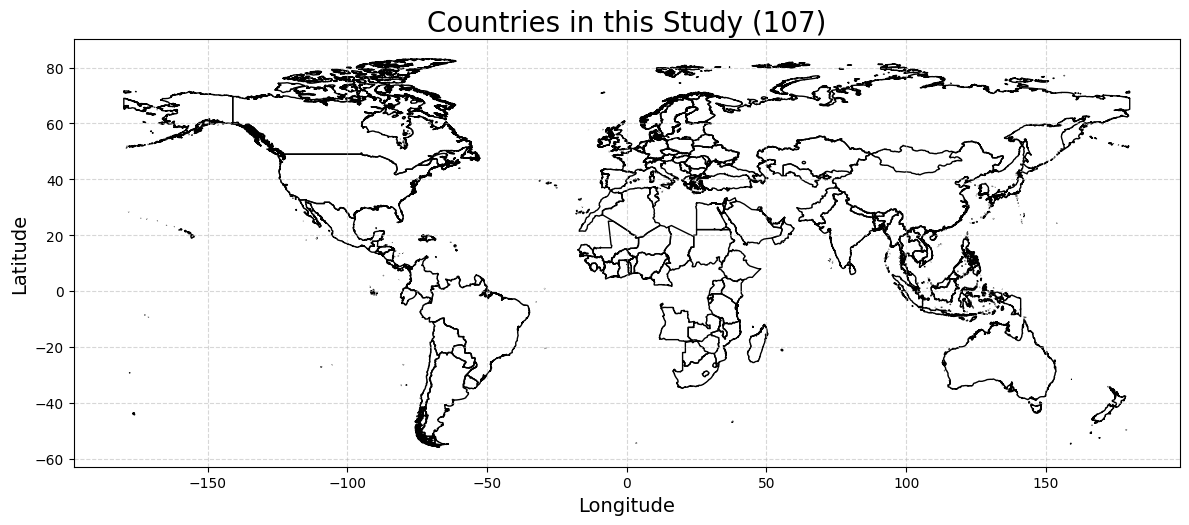

In [15]:
# Countries in this Study:
# Convert to GeoDataFrame, telling GeoPandas which column holds the geometry
food_gdf = gpd.GeoDataFrame(food, geometry='geometry')

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 9), dpi=100)
food_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title("Countries in this Study (107)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

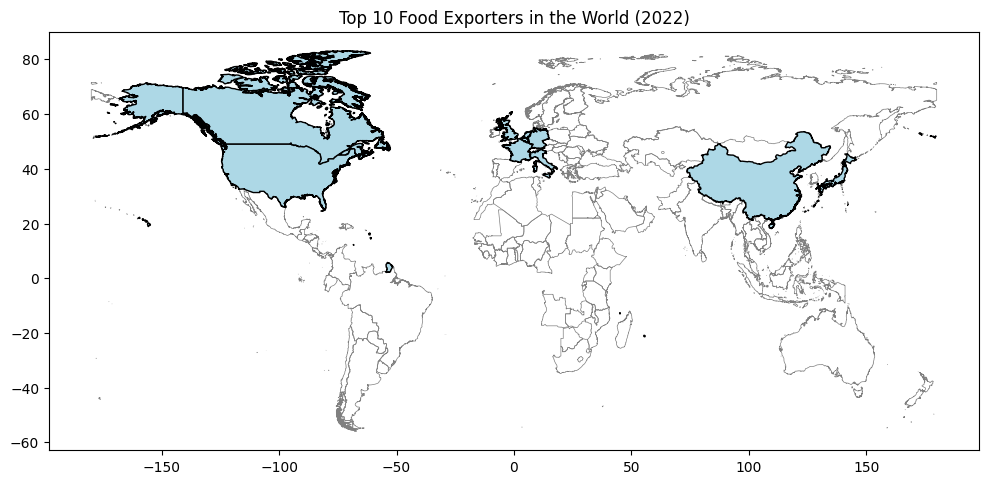

In [16]:
# Top 10 Food Exporters
gdf = gpd.GeoDataFrame(food, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# List of countries to be highlighted with red fill
blue_countries = [
    "United States", "United Kingdom", "Germany", "China",
    "Netherlands", "France", "Canada", "Japan", "Belgium", "Italy"
]

# Create two subsets: one for red-filled countries and one for the rest (outlined only)
gdf_blue = gdf[gdf['Country'].isin(blue_countries)]
gdf_other = gdf[~gdf['Country'].isin(blue_countries)]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot all but the highlighted countries with no fill (outline only)
gdf_other.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the highlighted countries with a fill and black border
gdf_blue.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1)

# Optional: add title and display the map
ax.set_title("Top 10 Food Exporters in the World (2022)")
plt.show()

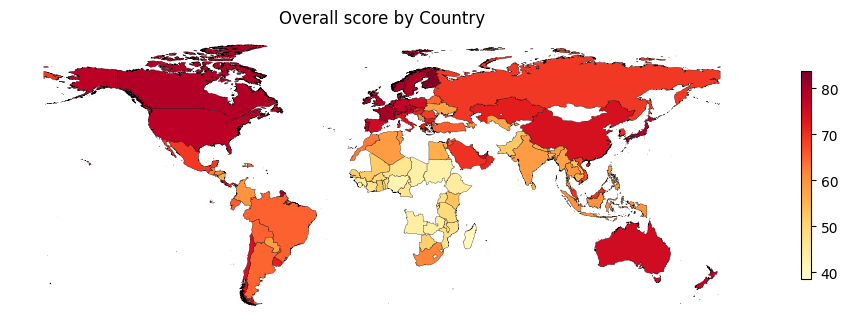

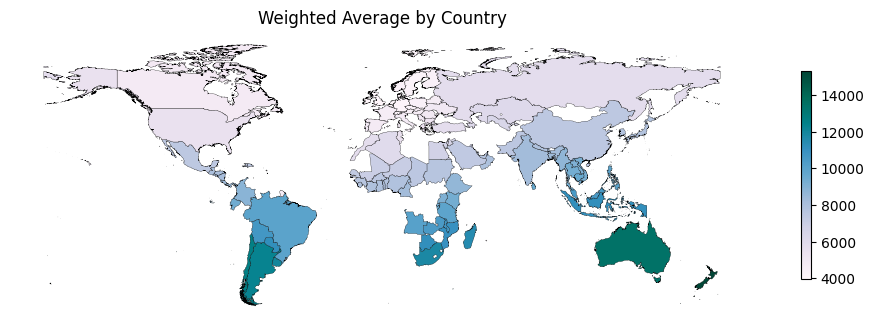

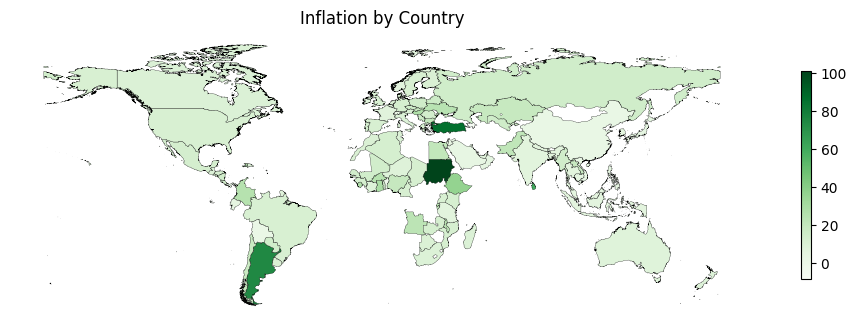

In [17]:
# Chloropleths
numeric_cols = ['Overall score', 'Weighted Average', 'Inflation']
cmaps = ['YlOrRd', 'PuBuGn', 'Greens', 'OrRd']  # pick distinct colormaps

for col, cmap in zip(numeric_cols, cmaps):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    food_gdf.plot(
        column=col,
        cmap=cmap,
        legend=True,
        edgecolor='black',
        linewidth=0.2,
    legend_kwds={
        'shrink': 0.3,
    },
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "No data"
        },
        ax=ax
    )
    ax.set_title(f"{col} by Country")
    ax.set_axis_off()
    plt.show()

# NOTE: For Weighted Average, lower values are better.

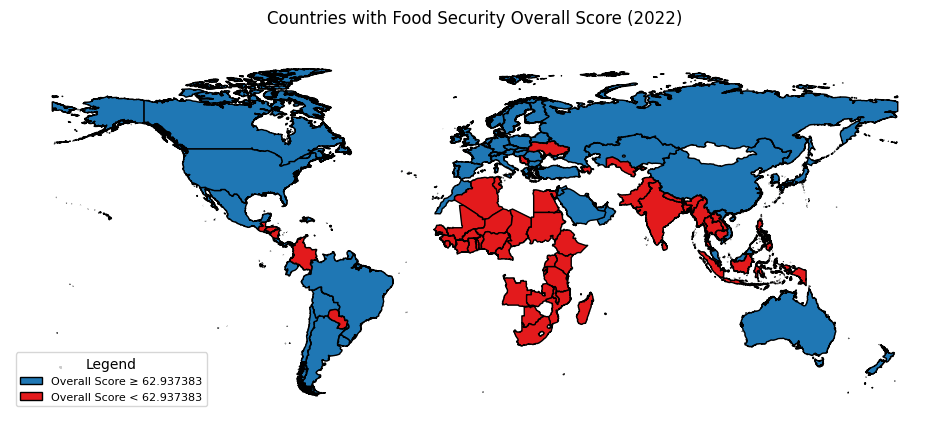

In [18]:
# FOOD SECURITY SCORE ABOVE OR BELOW AVERAGE
gdf = gpd.GeoDataFrame(food, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  # Adjust the CRS if needed

# Define the threshold for Overall Score
threshold = 62.937383

# Create subsets for high (blue) and low (red) scores
gdf_high = gdf[gdf['Overall score'] >= threshold]
gdf_low = gdf[gdf['Overall score'] < threshold]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot all countries as outlines for context
gdf.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the countries with respective colors
gdf_high.plot(ax=ax, color="#1f77b4", edgecolor='black', linewidth=1)
gdf_low.plot(ax=ax, color="#e31a1c", edgecolor='black', linewidth=1)

# Set the title with an explanation of the colors
ax.set_title(
    f"Countries with Food Security Overall Score (2022)\n"
    #f"Blue: Overall Score ≥ {threshold} | Red: Overall Score < {threshold}"
)

ax.set_axis_off() # clean

# Create custom legend patches
legend_elements = [
    Patch(facecolor="#1f77b4", edgecolor='black', label=f'Overall Score ≥ {threshold}'),
    Patch(facecolor="#e31a1c", edgecolor='black', label=f'Overall Score < {threshold}')
]

# Add legend with smaller markers (using markerscale) and smaller text (using prop)
ax.legend(
    handles=legend_elements,
    title="Legend",
    loc='lower left',
    prop={'size': 8},
    markerscale=0.5
)

# Display the map
plt.show()

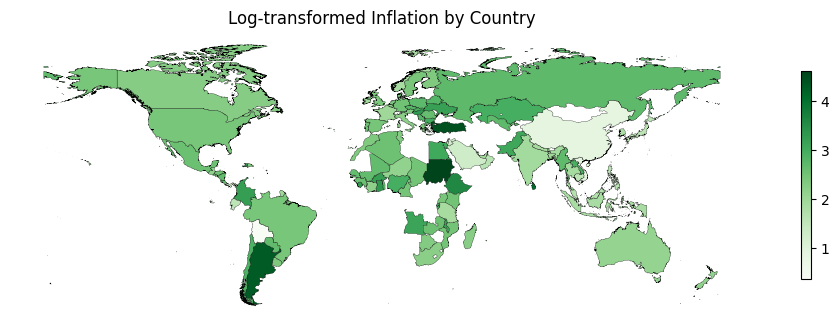

In [19]:
# Inflation Chloropleth without Outliers
food_gdf['log_Inflation'] = (food_gdf['Inflation'] + 1e-6).apply(np.log)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
food_gdf.plot(
    column='log_Inflation',
    cmap='Greens',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    ax=ax,
    legend_kwds={
        'shrink': 0.3,
    }
)
ax.set_title("Log‐transformed Inflation by Country")
ax.set_axis_off()
plt.show()

<ipython-input-20-b12316cc3bcb>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-20-b12316cc3bcb>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


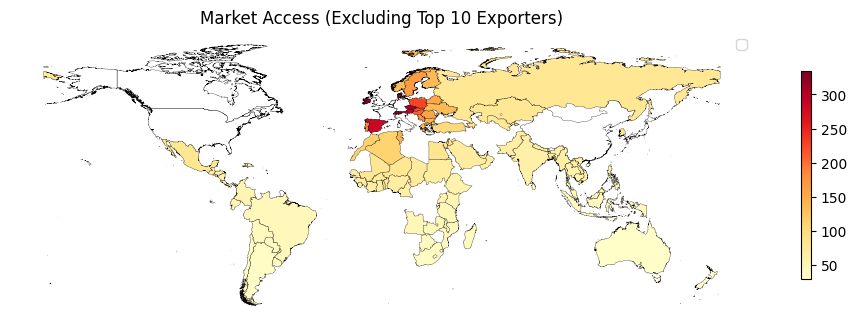

<ipython-input-20-b12316cc3bcb>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-20-b12316cc3bcb>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


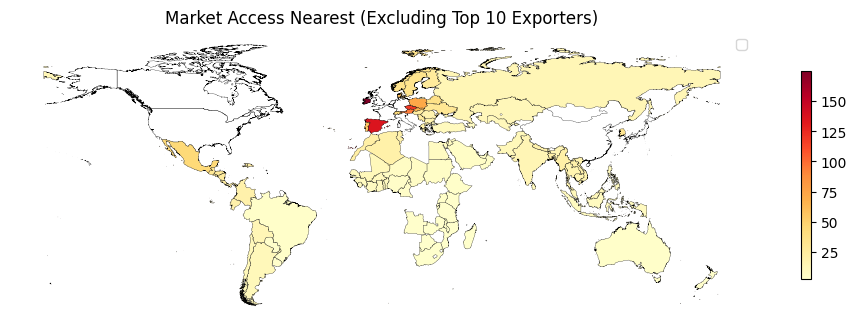

In [20]:
# Market Access Heatmap Excluding Top 10 Exporters (Overall and from Shortest)
# Define the columns to map and their corresponding titles
columns = ["Market Access", "Market Access Nearest"]
titles = [
    "Market Access (Excluding Top 10 Exporters)",
    "Market Access Nearest (Excluding Top 10 Exporters)"
]

for col, title in zip(columns, titles):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    # 1) Plot blue countries as outlines only (excluded)
    food_gdf[food_gdf['Country'].isin(blue_countries)].plot(
        ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.2,
        label='Excluded (outlined)'
    )

    # 2) Plot the remaining countries as a choropleth based on the current column
    food_gdf[~food_gdf['Country'].isin(blue_countries)].plot(
        column=col,
        cmap='YlOrRd',
        legend=True,
        edgecolor='black',
        linewidth=0.2,
        ax=ax,
        legend_kwds={'shrink': 0.3}
    )

    ax.set_title(title)
    ax.set_axis_off()
    plt.legend()
    plt.show()

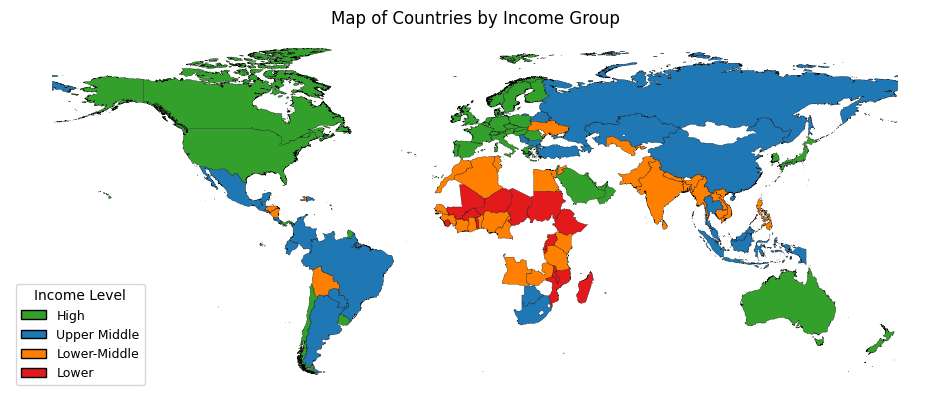

In [21]:
# Chloropleth for Income Group Countries:
def get_income_label(row):
    if row['income_H'] == 1:
        return "High"
    elif row['income_UM'] == 1:
        return "Upper Middle"
    elif row['income_LM'] == 1:
        return "Lower-Middle"
    elif row['income_L'] == 1:
        return "Lower"
    else:
        return "Unknown"

# Create a new column with human-readable income labels
food_gdf['Income_Label'] = food_gdf.apply(get_income_label, axis=1)

# Define custom colors for each income category
colors = {
    "High": "#33a02c",
    "Upper Middle": "#1f77b4",
    "Lower-Middle": "#ff7f00",
    "Lower": "#e31a1c",
    "Unknown": "lightgrey"  # In case none of the binary flags is set
}

# Map each row to its corresponding color
food_gdf['color'] = food_gdf['Income_Label'].map(colors)

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
food_gdf.plot(color=food_gdf['color'], edgecolor='black', linewidth=0.2, ax=ax)
ax.set_title("Map of Countries by Income Group")
ax.set_axis_off()

# Build custom legend
legend_elements = [Patch(facecolor=colors[label], edgecolor='black', label=label)
                   for label in colors if label != "Unknown"]

ax.legend(handles=legend_elements, title="Income Level", loc='lower left', prop = {'size': 9}, markerscale = 0.7)
plt.show()

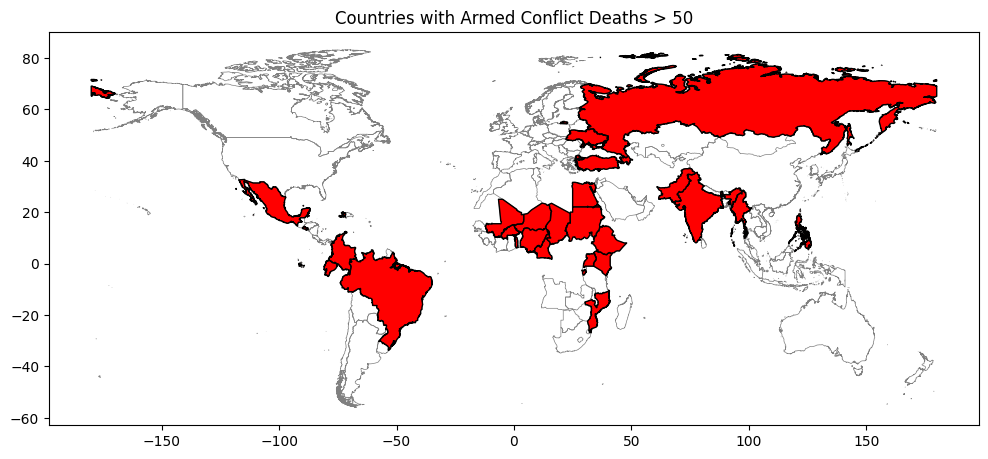

In [22]:
# Conflicts
## VERY IMPORTANT: SET n (where n is the threshold for conflict related deaths. If greater than n we consider that country to have conflict)
## I was gonna do median but MEDIAN IS 0 WHILE MEAN IS 2,700 SO WE KINDA EYEBALL HERE
n = 50 #50, 81, 100 are good choices

# Convert final_final_dataset into a GeoDataFrame (if it's not one already)
gdf = gpd.GeoDataFrame(food, geometry='geometry')

# Set the CRS if not already set (adjust if your data uses a different CRS)
gdf.set_crs(epsg=4326, inplace=True)

# Filter for countries where Conflict > n
gdf_conflict = gdf[gdf['Conflict'] > n]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 9))

# First, plot all countries as an outline
gdf.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the countries with Conflict > n in red fill (with black borders)
gdf_conflict.plot(ax=ax, color='red', edgecolor='black', linewidth=1)

# Add a title for clarity
ax.set_title(f"Countries with Armed Conflict Deaths > {n}")
plt.show()

#### **Correlations**

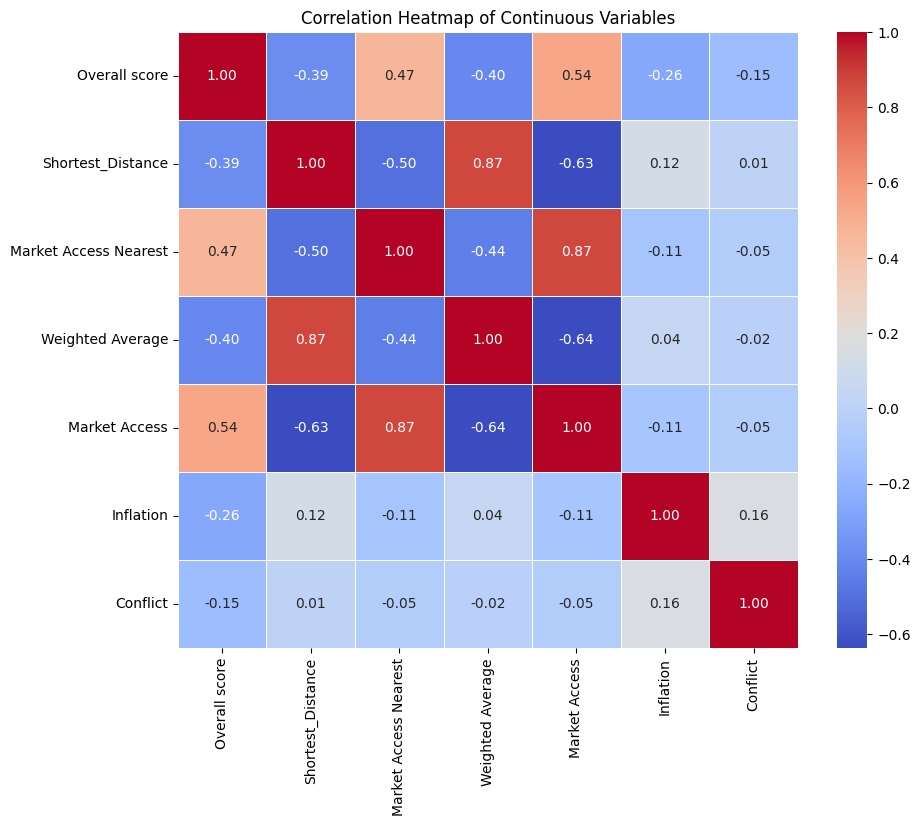

In [23]:
# Correlation Heatmap of Continous Variables
continuous_vars = [
    "Overall score",
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",   # 2022 data
    "Conflict"
]

#     'Market Access',
#     #'income_L',
#     #'income_LM',
#     #'income_UM',
#     'rain',
#     'agri',
#     'trade',
#     'elec'
# ]
# Create a subset of the DataFrame using the continuous variables
df_cont = food[continuous_vars]
#df_cont = food5[continuous_vars]

# Calculate the correlation matrix
corr_matrix = df_cont.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

In [24]:
# --- 1) Conflict Flag vs Overall Score ---
# Compute the point-biserial correlation between the binary "Conflict Flag" and "Overall score"
pb_corr, pb_p = pointbiserialr(food["Conflict Flag"], food["Overall score"])

# --- 2) Income vs Overall Score ---
# Derive a single income label from the binary income columns
def get_income_label(row):
    if row['income_H'] == 1:
        return "High"
    elif row['income_UM'] == 1:
        return "Upper Middle"
    elif row['income_LM'] == 1:
        return "Lower-Middle"
    elif row['income_L'] == 1:
        return "Lower"
    else:
        return "Unknown"

# Create a new income label column
food["Income_Label"] = food.apply(get_income_label, axis=1)

# Define the desired ordering for income categories (from lowest to highest)
income_order = ['Lower', 'Lower-Middle', 'Upper Middle', 'High']

# Convert income labels to an ordered categorical and then to numeric codes.
food["Income_Order"] = pd.Categorical(
    food["Income_Label"], categories=income_order, ordered=True
).codes

# Compute Spearman rank correlation for Income vs Overall Score
spearman_corr, spearman_p = spearmanr(food["Income_Order"], food["Overall score"])

# --- Create a Nice Summary Table ---
summary_data = {
    "Comparison": [
        "Conflict Flag vs Overall Score",
        "Income vs Overall Score"
    ],
    "Correlation": [pb_corr, spearman_corr],
    "p-value": [pb_p, spearman_p]
}

results = pd.DataFrame(summary_data)

# Format correlation values and p-values to 3 decimal places (p-value in scientific notation if needed)
results["Correlation"] = results["Correlation"].map(lambda x: f"{x:.3f}")
results["p-value"] = results["p-value"].map(lambda x: f"{x:.3g}")

# Display the table using Pandas styling for a nicer look
results_styled = results.style.set_caption("Correlation Summary") \
    .set_table_styles([
        {
            'selector': 'caption',
            'props': [('color', 'black'),
                      ('font-size', '16px'),
                      ('text-align', 'center')]
        },
        {
            'selector': 'th',
            'props': [('font-size', '12px'),
                      ('text-align', 'center'),
                      ('background-color', '#f0f0f0')]
        },
        {
            'selector': 'td',
            'props': [('font-size', '12px'),
                      ('text-align', 'center')]
        }
    ])

# Alternatively, for a simple printed table in the console
print("\nCorrelation Summary:")
print(results.to_markdown(index=False))


Correlation Summary:
| Comparison                     |   Correlation |   p-value |
|:-------------------------------|--------------:|----------:|
| Conflict Flag vs Overall Score |        -0.457 |  7.37e-07 |
| Income vs Overall Score        |         0.894 |  2.08e-38 |


# **Part 1.2: Adding Some More Variables**
AND OBVIOUSLY BECAUSE THESE NEW VARIABLES WILL MAKE SENSE
- Precipitation
- Agricultural Land
- Exports/Imports as % of GDP
- Access to Electricity

**Note: Food inflation will just be a proxy for food security**
**Note: Conflict analysis gone**

#### **Precipitation Avg Annual MM**
- Predetermined by Nature

In [25]:
rain = pd.read_excel("/content/rain.xlsx", sheet_name="Data", engine="openpyxl").iloc[3:, [0, 65]]
rain.rename(columns={"Data Source": "Country", "Unnamed: 65":"rain"}, inplace=True)
rain = rain.dropna()
rain = rain.sort_values(by="Country")
rain

Country    rain
5            Afghanistan   327.0
8                Albania  1485.0
63               Algeria    89.0
7                 Angola  1010.0
15   Antigua and Barbuda  1030.0
..                   ...     ...
260             Viet Nam  1821.0
199   West Bank and Gaza   402.0
265          Yemen, Rep.   167.0
267               Zambia  1020.0
268             Zimbabwe   657.0

[182 rows x 2 columns]

In [26]:
# Double Check
country_list = rain['Country'].tolist()
print(country_list)
food_list = food['Country'].tolist()
print(food_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', '

In [27]:
# Merge rain to food
# Step 1: Define mapping from rain country names → food country names
country_mapping = {
    "Cote d'Ivoire": "Ivory Coast",
    "Egypt, Arab Rep.": "Egypt",
    "Russian Federation": "Russia",
    "Korea, Rep.": "South Korea",
    "Czechia": "Czech Republic",
    "Slovak Republic": "Slovakia",
    "Viet Nam": "Vietnam",
    "Lao PDR": "Laos",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran",
    "Syrian Arab Republic": "Syria",
    "Yemen, Rep.": "Yemen",
    "Turkiye": "Turkey"
}

# Step 2: Standardize country names in rain
rain['Country'] = rain['Country'].replace(country_mapping)

# Step 3: Filter rain to keep only countries found in food
# rain_filtered = rain[rain['Country'].isin(food['Country'])]

# Step 4: Merge food and rain on standardized country names
food2 = food.merge(rain, how='inner')
food2

Country  Conflict  Overall score  United States  United Kingdom  \
0          Algeria        10           58.9    9524.101077     2925.728564   
1           Angola        19           43.7   14038.882323     7635.723037   
2        Argentina         0           64.8   10187.205076    11598.860261   
3        Australia         0           75.4   13768.869139    15316.436936   
4          Austria         0           78.1    8416.281815     1394.152865   
..             ...       ...            ...            ...             ...   
101  United States         1           78.0       0.000000     7086.076100   
102        Uruguay         0           71.8   10411.242961    10925.884854   
103     Uzbekistan         0           57.5   10282.105793     4911.217109   
104        Vietnam         0           67.9   12060.623838     9703.596732   
105         Zambia         0           43.5   14850.578819     8057.521610   

          Germany         China   Netherlands        France        Canada  \
0     2633.681183   9088.895760   2668.393961   1634.883790   7838.637705   
1     7083.610259  10492.894760   7254.131482   6402.332434  12565.676033   
2    12102.410193  19017.557742  11871.849796  10703.401522  11167.652101   
3    14558.447947   7635.130076  14885.373916  15724.754872  14449.705300   
4      476.333500   7086.593311    809.859929   1455.889396   6487.692311   
..            ...           ...           ...           ...           ...   
101   7940.247105  10172.141735   7629.163284   8028.814127   1971.140270   
102  11357.375204  18129.457223  11151.542961   9951.000190  11144.626952   
103   4080.774437   3522.446741   4420.375349   5304.641611   8425.331933   
104   8978.210114   2227.995224   9288.195990  10259.310337  11069.748139   
105   7375.028546   9691.653214   7603.278370   6930.061828  13187.152395   

     ...  income_UM  income_LM  income_H  Inflation  \
0    ...        0.0        1.0       0.0  12.701900   
1    ...        0.0        1.0       0.0  22.870395   
2    ...        1.0        0.0       0.0  74.630560   
3    ...        0.0        0.0       1.0   8.166700   
4    ...        0.0        0.0       1.0  10.748240   
..   ...        ...        ...       ...        ...   
101  ...        0.0        0.0       1.0  11.438880   
102  ...        0.0        0.0       1.0  10.593382   
103  ...        0.0        1.0       0.0  15.046252   
104  ...        0.0        1.0       0.0   2.413387   
105  ...        0.0        1.0       0.0  12.847919   

                                              geometry  Conflict Flag  \
0    POLYGON ((-4.821613117999902 24.99506459600009...              0   
1    MULTIPOLYGON (((13.073702840000067 -4.63532318...              0   
2    MULTIPOLYGON (((-67.19390417499997 -22.8222234...              0   
3    MULTIPOLYGON (((131.53589928500003 -31.6055640...              0   
4    POLYGON ((16.945042766000142 48.60416615800007...              0   
..                                                 ...            ...   
101  MULTIPOLYGON (((-122.75301682799991 48.9925145...              0   
102  POLYGON ((-57.602792548565105 -30.190516953885...              0   
103  MULTIPOLYGON (((71.7855196540001 39.9897048950...              0   
104  MULTIPOLYGON (((107.52039270000006 14.70458160...              0   
105  POLYGON ((32.9208634850001 -9.407900085999913,...              0   

     Market Access Nearest  Income_Label  Income_Order    rain  
0                19.130555  Lower-Middle             1    89.0  
1                 2.973166  Lower-Middle             1  1010.0  
2                11.253922  Upper Middle             2   591.0  
3                 4.045709          High             3   534.0  
4                95.236714          High             3  1110.0  
..                     ...           ...           ...     ...  
101             498.985763          High             3   715.0  
102               3.143024          High             3  1300.0  
103              10.853669

In [28]:
missing_from_food = set(food['Country']) - set(food2['Country'])
print("Missing countries from food:", missing_from_food)

Missing countries from food: {'Serbia'}


#### **Agricultural Land %**
- Exogeneous in Cross Section + We are controlling for Country Income

In [29]:
agri = pd.read_excel("/content/agri.xlsx", sheet_name="Data", engine="openpyxl").iloc[3:, [0, 66]]
agri.rename(columns={"Data Source": "Country", "Unnamed: 66":"agri"}, inplace=True)
agri = agri.dropna()
agri = agri.sort_values(by="Country")
agri

Country       agri
5                    Afghanistan  58.741548
4    Africa Eastern and Southern  46.541210
6     Africa Western and Central  41.432820
8                        Albania  41.445255
63                       Algeria  17.344506
..                           ...        ...
259        Virgin Islands (U.S.)   9.428571
262                        World  36.883593
265                  Yemen, Rep.  44.419190
267                       Zambia  32.067959
268                     Zimbabwe  39.489284

[253 rows x 2 columns]

In [30]:
# Merge rain to food
# Step 1: Define mapping from rain country names → food country names
country_mapping = {
    "Cote d'Ivoire": "Ivory Coast",
    "Egypt, Arab Rep.": "Egypt",
    "Russian Federation": "Russia",
    "Korea, Rep.": "South Korea",
    "Czechia": "Czech Republic",
    "Slovak Republic": "Slovakia",
    "Viet Nam": "Vietnam",
    "Lao PDR": "Laos",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran",
    "Syrian Arab Republic": "Syria",
    "Yemen, Rep.": "Yemen",
    "Turkiye": "Turkey"
}



# Step 2: Standardize country names in rain
agri['Country'] = agri['Country'].replace(country_mapping)

# Step 3: Filter rain to keep only countries found in food
# rain_filtered = rain[rain['Country'].isin(food['Country'])]

# Step 4: Merge food and rain on standardized country names
food3 = food2.merge(agri, how='inner')
food3

Country  Conflict  Overall score  United States  United Kingdom  \
0          Algeria        10           58.9    9524.101077     2925.728564   
1           Angola        19           43.7   14038.882323     7635.723037   
2        Argentina         0           64.8   10187.205076    11598.860261   
3        Australia         0           75.4   13768.869139    15316.436936   
4          Austria         0           78.1    8416.281815     1394.152865   
..             ...       ...            ...            ...             ...   
99   United States         1           78.0       0.000000     7086.076100   
100        Uruguay         0           71.8   10411.242961    10925.884854   
101     Uzbekistan         0           57.5   10282.105793     4911.217109   
102        Vietnam         0           67.9   12060.623838     9703.596732   
103         Zambia         0           43.5   14850.578819     8057.521610   

          Germany         China   Netherlands        France        Canada  \
0     2633.681183   9088.895760   2668.393961   1634.883790   7838.637705   
1     7083.610259  10492.894760   7254.131482   6402.332434  12565.676033   
2    12102.410193  19017.557742  11871.849796  10703.401522  11167.652101   
3    14558.447947   7635.130076  14885.373916  15724.754872  14449.705300   
4      476.333500   7086.593311    809.859929   1455.889396   6487.692311   
..            ...           ...           ...           ...           ...   
99    7940.247105  10172.141735   7629.163284   8028.814127   1971.140270   
100  11357.375204  18129.457223  11151.542961   9951.000190  11144.626952   
101   4080.774437   3522.446741   4420.375349   5304.641611   8425.331933   
102   8978.210114   2227.995224   9288.195990  10259.310337  11069.748139   
103   7375.028546   9691.653214   7603.278370   6930.061828  13187.152395   

     ...  income_LM  income_H  Inflation  \
0    ...        1.0       0.0  12.701900   
1    ...        1.0       0.0  22.870395   
2    ...        0.0       0.0  74.630560   
3    ...        0.0       1.0   8.166700   
4    ...        0.0       1.0  10.748240   
..   ...        ...       ...        ...   
99   ...        0.0       1.0  11.438880   
100  ...        0.0       1.0  10.593382   
101  ...        1.0       0.0  15.046252   
102  ...        1.0       0.0   2.413387   
103  ...        1.0       0.0  12.847919   

                                              geometry Conflict Flag  \
0    POLYGON ((-4.821613117999902 24.99506459600009...             0   
1    MULTIPOLYGON (((13.073702840000067 -4.63532318...             0   
2    MULTIPOLYGON (((-67.19390417499997 -22.8222234...             0   
3    MULTIPOLYGON (((131.53589928500003 -31.6055640...             0   
4    POLYGON ((16.945042766000142 48.60416615800007...             0   
..                                                 ...           ...   
99   MULTIPOLYGON (((-122.75301682799991 48.9925145...             0   
100  POLYGON ((-57.602792548565105 -30.190516953885...             0   
101  MULTIPOLYGON (((71.7855196540001 39.9897048950...             0   
102  MULTIPOLYGON (((107.52039270000006 14.70458160...             0   
103  POLYGON ((32.9208634850001 -9.407900085999913,...             0   

     Market Access Nearest  Income_Label  Income_Order    rain       agri  
0                19.130555  Lower-Middle             1    89.0  17.344506  
1                 2.973166  Lower-Middle             1  1010.0  36.814791  
2                11.253922  Upper Middle             2   591.0  43.427782  
3                 4.045709          High             3   534.0  47.259237  
4                95.236714          High             3  1110.0  31.476584  
..                     ...           ...           ...     ...        ...  
99              498.985763          High             3   715.0  45.085151  
100               3.143024          High             3  1300.0  80.873529  
101              10.853669  Lower-Middle             1   206.0  58.4792

In [31]:
missing_from_food = set(food2['Country']) - set(food3['Country'])
print("Missing countries from food:", missing_from_food)

Missing countries from food: {'Israel', 'Oman'}


#### **Exports/Imports as % of GDP**
- Exports/Imports as % of GDP (proxy for trade ability)

In [32]:
trade = pd.read_excel("/content/trade.xlsx", sheet_name="Data", engine="openpyxl").iloc[3:, [0, 66]]
trade.rename(columns={"Data Source": "Country", "Unnamed: 66":"trade"}, inplace=True)
trade = trade.dropna()
trade = trade.sort_values(by="Country")
trade

Country      trade
5                    Afghanistan  18.380042
4    Africa Eastern and Southern  27.631441
8                        Albania  37.197085
63                       Algeria  30.808979
14                American Samoa  46.957520
..                           ...        ...
259        Virgin Islands (U.S.)  97.367295
199           West Bank and Gaza  18.436253
262                        World  30.993700
267                       Zambia  40.193998
268                     Zimbabwe  27.872171

[223 rows x 2 columns]

In [33]:
country_mapping = {
    "Cote d'Ivoire": "Ivory Coast",
    "Egypt, Arab Rep.": "Egypt",
    "Russian Federation": "Russia",
    "Korea, Rep.": "South Korea",
    "Czechia": "Czech Republic",
    "Slovak Republic": "Slovakia",
    "Viet Nam": "Vietnam",
    "Lao PDR": "Laos",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran",
    "Syrian Arab Republic": "Syria",
    "Yemen, Rep.": "Yemen",
    "Turkiye": "Turkey"
}

# Step 2: Standardize country names in rain
trade['Country'] = trade['Country'].replace(country_mapping)
trade = trade.sort_values(by="Country")

# Step 3: Filter rain to keep only countries found in food
# rain_filtered = rain[rain['Country'].isin(food['Country'])]

# Step 4: Merge food and rain on standardized country names
food4 = food3.merge(trade, how='inner')
food4

Country  Conflict  Overall score  United States  United Kingdom  \
0         Algeria        10           58.9    9524.101077     2925.728564   
1          Angola        19           43.7   14038.882323     7635.723037   
2       Argentina         0           64.8   10187.205076    11598.860261   
3       Australia         0           75.4   13768.869139    15316.436936   
4         Austria         0           78.1    8416.281815     1394.152865   
..            ...       ...            ...            ...             ...   
95  United States         1           78.0       0.000000     7086.076100   
96        Uruguay         0           71.8   10411.242961    10925.884854   
97     Uzbekistan         0           57.5   10282.105793     4911.217109   
98        Vietnam         0           67.9   12060.623838     9703.596732   
99         Zambia         0           43.5   14850.578819     8057.521610   

         Germany         China   Netherlands        France        Canada  ...  \
0    2633.681183   9088.895760   2668.393961   1634.883790   7838.637705  ...   
1    7083.610259  10492.894760   7254.131482   6402.332434  12565.676033  ...   
2   12102.410193  19017.557742  11871.849796  10703.401522  11167.652101  ...   
3   14558.447947   7635.130076  14885.373916  15724.754872  14449.705300  ...   
4     476.333500   7086.593311    809.859929   1455.889396   6487.692311  ...   
..           ...           ...           ...           ...           ...  ...   
95   7940.247105  10172.141735   7629.163284   8028.814127   1971.140270  ...   
96  11357.375204  18129.457223  11151.542961   9951.000190  11144.626952  ...   
97   4080.774437   3522.446741   4420.375349   5304.641611   8425.331933  ...   
98   8978.210114   2227.995224   9288.195990  10259.310337  11069.748139  ...   
99   7375.028546   9691.653214   7603.278370   6930.061828  13187.152395  ...   

    income_H  Inflation                                           geometry  \
0        0.0  12.701900  POLYGON ((-4.821613117999902 24.99506459600009...   
1        0.0  22.870395  MULTIPOLYGON (((13.073702840000067 -4.63532318...   
2        0.0  74.630560  MULTIPOLYGON (((-67.19390417499997 -22.8222234...   
3        1.0   8.166700  MULTIPOLYGON (((131.53589928500003 -31.6055640...   
4        1.0  10.748240  POLYGON ((16.945042766000142 48.60416615800007...   
..       ...        ...                                                ...   
95       1.0  11.438880  MULTIPOLYGON (((-122.75301682799991 48.9925145...   
96       1.0  10.593382  POLYGON ((-57.602792548565105 -30.190516953885...   
97       0.0  15.046252  MULTIPOLYGON (((71.7855196540001 39.9897048950...   
98       0.0   2.413387  MULTIPOLYGON (((107.52039270000006 14.70458160...   
99       0.0  12.847919  POLYGON ((32.9208634850001 -9.407900085999913,...   

    Conflict Flag Market Access Nearest  Income_Label  Income_Order    rain  \
0               0             19.130555  Lower-Middle             1    89.0   
1               0              2.973166  Lower-Middle             1  1010.0   
2               0             11.253922  Upper Middle             2   591.0   
3               0              4.045709          High             3   534.0   
4               0             95.236714          High             3  1110.0   
..            ...                   ...           ...           ...     ...   
95              0            498.985763          High             3   715.0   
96              0              3.143024          High             3  1300.0   
97              0             10.853669  Lower-Middle             1   206.0   
98              0             17.159584  Lower-Middle             1  1821.0   
99              0              2.831995  Lower-Middle             1  1020.0   

         agri      trade  
0   17.344506  30.808979  
1   36.814791  44.391642  
2   43.427782  16.248014  
3   47.259237  25.531588  
4   31.476584  61.962673  
..        ...        ...  
95  45.085151  11.602228  
96  80.873

In [34]:
missing_from_food = set(food3['Country']) - set(food4['Country'])
print("Missing countries from food:", missing_from_food)
#whatever, I do NOT care anymore. I definitely want to try something with stocks sigh.

Missing countries from food: {'Laos', 'Nigeria', 'Myanmar', 'Malawi'}


#### **Access to Electricity %**
- https://www.sciencedirect.com/science/article/abs/pii/S0305750X21000024
- Controlling for Income

In [35]:
elec = pd.read_excel("/content/elec.xlsx", sheet_name="Data", engine="openpyxl").iloc[3:, [0, 66]]
elec.rename(columns={"Data Source": "Country", "Unnamed: 66":"elec"}, inplace=True)
elec = elec.dropna()
elec = elec.sort_values(by="Country")
elec

Country        elec
5                    Afghanistan   85.300000
4    Africa Eastern and Southern   48.801258
6     Africa Western and Central   55.686683
8                        Albania  100.000000
63                       Algeria  100.000000
..                           ...         ...
199           West Bank and Gaza  100.000000
262                        World   91.288788
265                  Yemen, Rep.   76.000000
267                       Zambia   47.800000
268                     Zimbabwe   50.100000

[263 rows x 2 columns]

In [36]:
country_mapping = {
    "Cote d'Ivoire": "Ivory Coast",
    "Egypt, Arab Rep.": "Egypt",
    "Russian Federation": "Russia",
    "Korea, Rep.": "South Korea",
    "Czechia": "Czech Republic",
    "Slovak Republic": "Slovakia",
    "Viet Nam": "Vietnam",
    "Lao PDR": "Laos",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran",
    "Syrian Arab Republic": "Syria",
    "Yemen, Rep.": "Yemen",
    "Turkiye": "Turkey"
}

# Step 2: Standardize country names in rain
elec['Country'] = elec['Country'].replace(country_mapping)

# Step 3: Filter rain to keep only countries found in food
# rain_filtered = rain[rain['Country'].isin(food['Country'])]

# Step 4: Merge food and rain on standardized country names
food5 = food4.merge(elec, on = 'Country', how='inner')
food5

Country  Conflict  Overall score  United States  United Kingdom  \
0         Algeria        10           58.9    9524.101077     2925.728564   
1          Angola        19           43.7   14038.882323     7635.723037   
2       Argentina         0           64.8   10187.205076    11598.860261   
3       Australia         0           75.4   13768.869139    15316.436936   
4         Austria         0           78.1    8416.281815     1394.152865   
..            ...       ...            ...            ...             ...   
95  United States         1           78.0       0.000000     7086.076100   
96        Uruguay         0           71.8   10411.242961    10925.884854   
97     Uzbekistan         0           57.5   10282.105793     4911.217109   
98        Vietnam         0           67.9   12060.623838     9703.596732   
99         Zambia         0           43.5   14850.578819     8057.521610   

         Germany         China   Netherlands        France        Canada  ...  \
0    2633.681183   9088.895760   2668.393961   1634.883790   7838.637705  ...   
1    7083.610259  10492.894760   7254.131482   6402.332434  12565.676033  ...   
2   12102.410193  19017.557742  11871.849796  10703.401522  11167.652101  ...   
3   14558.447947   7635.130076  14885.373916  15724.754872  14449.705300  ...   
4     476.333500   7086.593311    809.859929   1455.889396   6487.692311  ...   
..           ...           ...           ...           ...           ...  ...   
95   7940.247105  10172.141735   7629.163284   8028.814127   1971.140270  ...   
96  11357.375204  18129.457223  11151.542961   9951.000190  11144.626952  ...   
97   4080.774437   3522.446741   4420.375349   5304.641611   8425.331933  ...   
98   8978.210114   2227.995224   9288.195990  10259.310337  11069.748139  ...   
99   7375.028546   9691.653214   7603.278370   6930.061828  13187.152395  ...   

    Inflation                                           geometry  \
0   12.701900  POLYGON ((-4.821613117999902 24.99506459600009...   
1   22.870395  MULTIPOLYGON (((13.073702840000067 -4.63532318...   
2   74.630560  MULTIPOLYGON (((-67.19390417499997 -22.8222234...   
3    8.166700  MULTIPOLYGON (((131.53589928500003 -31.6055640...   
4   10.748240  POLYGON ((16.945042766000142 48.60416615800007...   
..        ...                                                ...   
95  11.438880  MULTIPOLYGON (((-122.75301682799991 48.9925145...   
96  10.593382  POLYGON ((-57.602792548565105 -30.190516953885...   
97  15.046252  MULTIPOLYGON (((71.7855196540001 39.9897048950...   
98   2.413387  MULTIPOLYGON (((107.52039270000006 14.70458160...   
99  12.847919  POLYGON ((32.9208634850001 -9.407900085999913,...   

    Conflict Flag  Market Access Nearest  Income_Label  Income_Order    rain  \
0               0              19.130555  Lower-Middle             1    89.0   
1               0               2.973166  Lower-Middle             1  1010.0   
2               0              11.253922  Upper Middle             2   591.0   
3               0               4.045709          High             3   534.0   
4               0              95.236714          High             3  1110.0   
..            ...                    ...           ...           ...     ...   
95              0             498.985763          High             3   715.0   
96              0               3.143024          High             3  1300.0   
97              0              10.853669  Lower-Middle             1   206.0   
98              0              17.159584  Lower-Middle             1  1821.0   
99              0               2.831995  Lower-Middle             1  1020.0   

         agri      trade   elec  
0   17.344506  30.808979  100.0  
1   36.814791  44.391642   48.5  
2   43.427782  16.248014  100.0  
3   47.259237  25.531588  100.0  
4   31.476584  61.962673  100.0  
..        ...        ...    ...  
95  45.085151  11.602228  100.0  
96  80.873529  31.952165  100.0  
97  58.479253  24.332176  10

In [37]:
missing_from_food = set(food4['Country']) - set(food5['Country'])
print("Missing countries from food:", missing_from_food)

Missing countries from food: set()


# **Part 1.3: Analytical Framework (New)**

### **1. Research Objective (From Original EDA)**
Global food security is an important issue. The review of related literature shows that a country’s food security can be largely linked to economic factors such as proximity to food exporters, income, infrastructure quality, and environmental conditions. With how globalization has grown over the decades, international food trade has also become more common as an alternative to curating food domestically.

- **Research Question:** Is closer geospatial proximity to the top 10 food exporters associated with higher national food security while controlling for economic factors such as income and trade reliance and environment factors such as rain and agricultural land?
- **Hypothesis:** Countries with shorter distances and better access to major food exporters will show significantly higher Food Security Index scores, controlling for income group and key infrastructure and environmental variables.

**Scope & Relevance** `CAN BE AT THE START`
Due to data availability, this study uses cross-sectional data covering the key variables in 2022 for 100 countries. The results can be useful for improving international trade policies and infrastructure investment for tackling food security challenges worldwide .

### **2. Data Cleaning and Sources (From Original EDA)**
**2.A. Summary of Data & Purpose**
`INSERT TABLE: https://chatgpt.com/share/682931e9-0e08-8009-b733-5261bdcf930f`

**2.B. Collection and Cleaning Process**
- All datsets were downloaded from the internet, manipulated and cleaned using Python. Process consisted of standardizing country identifiers, creating dummy variables, merging and filtering, dropping NAs, and using haversine distances to create proximity transformations (Weighted Average, Market Acess).


**2.C. Challenges**
- Many countries did not have data for certain variables which triffled down the initial list of over 200 countries to 100.
- Another problem in merging the cleaned separate datasets into one via a ‘Country’ column are the differences in how each dataset named their countries (e.g. ‘Côte d'Ivoire’ in one dataset, ‘Ivory Coast’ in another). The solution was to manually map countries using a python dictionary to match the primary dataset it was merging onto. this can be subject to human error.




### **3. Dataset Description**
**3.A. Table of Variables**
`INSERT TABLE FROM DOCUMENT (WITH CHANGES) [REDACTED]


In [38]:
cols = [
    'Country',
    'Overall score',
    'Weighted Average',
    'Market Access',
    'income_L',
    'income_LM',
    'income_UM',
    'income_H',
    'geometry',
    'rain',
    'agri',
    'trade',
    'elec'
]
foodsec = food5[cols].copy()
foodsec['log_Market_Access'] = np.log(foodsec['Market Access'])
foodsec['log_trade'] = np.log(foodsec['trade'].replace(0, np.nan))
foodsec['log_rain'] = np.log(foodsec['rain'].replace(0, np.nan))
foodsec

Country  Overall score  Weighted Average  Market Access  income_L  \
0         Algeria           58.9       5958.210208     111.328629       0.0   
1          Angola           43.7      10089.417624      46.332039       0.0   
2       Argentina           64.8      12305.199332      35.726990       0.0   
3       Australia           75.4      13448.413965      33.517659       0.0   
4         Austria           78.1       4466.288138     290.224170       0.0   
..            ...            ...               ...            ...       ...   
95  United States           78.0       5492.892791     747.551156       0.0   
96        Uruguay           71.8      11967.155149      36.747703       0.0   
97     Uzbekistan           57.5       6415.239797      76.572794       0.0   
98        Vietnam           67.9       9254.414222      59.102038       0.0   
99         Zambia           43.5      10416.386168      44.658781       0.0   

    income_LM  income_UM  income_H  \
0         1.0        0.0       0.0   
1         1.0        0.0       0.0   
2         0.0        1.0       0.0   
3         0.0        0.0       1.0   
4         0.0        0.0       1.0   
..        ...        ...       ...   
95        0.0        0.0       1.0   
96        0.0        0.0       1.0   
97        1.0        0.0       0.0   
98        1.0        0.0       0.0   
99        1.0        0.0       0.0   

                                             geometry    rain       agri  \
0   POLYGON ((-4.821613117999902 24.99506459600009...    89.0  17.344506   
1   MULTIPOLYGON (((13.073702840000067 -4.63532318...  1010.0  36.814791   
2   MULTIPOLYGON (((-67.19390417499997 -22.8222234...   591.0  43.427782   
3   MULTIPOLYGON (((131.53589928500003 -31.6055640...   534.0  47.259237   
4   POLYGON ((16.945042766000142 48.60416615800007...  1110.0  31.476584   
..                                                ...     ...        ...   
95  MULTIPOLYGON (((-122.75301682799991 48.9925145...   715.0  45.085151   
96  POLYGON ((-57.602792548565105 -30.190516953885...  1300.0  80.873529   
97  MULTIPOLYGON (((71.7855196540001 39.9897048950...   206.0  58.479253   
98  MULTIPOLYGON (((107.52039270000006 14.70458160...  1821.0  39.291195   
99  POLYGON ((32.9208634850001 -9.407900085999913,...  1020.0  32.067959   

        trade   elec  log_Market_Access  log_trade  log_rain  
0   30.808979  100.0           4.712486   3.427806  4.488636  
1   44.391642   48.5           3.835834   3.793051  6.917706  
2   16.248014  100.0           3.575906   2.787971  6.381816  
3   25.531588  100.0           3.512072   3.239916  6.280396  
4   61.962673  100.0           5.670654   4.126532  7.012115  
..        ...    ...                ...        ...       ...  
95  11.602228  100.0           6.616803   2.451197  6.572283  
96  31.952165  100.0           3.604076   3.464240  7.170120  
97  24.332176  100.0           4.338242   3.191800  5.327876  
98  93.811638  100.0           4.079265   4.541289  7.507141  
99  40.193998   47.8           3.799051   3.693718  6.927558  

[100 rows x 16 columns]

### **4. Exploratory Data Analysis (New)**
`DO NOT ADD TO THE PAPER; NOTABLE DIFFERENCESd (SINCE THE GOAL FROM SIR IS TO MAKE IT MAKE SENSE)`
- Removed histograms as they are redundant to descriptive stats.

#### **Descriptive Statistics** to identify scale and spread of the variables.

**Results**

- The average food security score of the 100 countries is 63.26 with moderate variability (12.26). Median is 64.9 and 25% of countries exceed 74.05 showing a mix of low and high food security levels.
- Proximity Transformations have wide range with very high standard deviations, implying that some have excepptionally high accessibility to those food exporters while others have low access.
- Precipitation, Trade Dependency, and Agricultural land show moderate to high variability among the countries.
- Electricity shows that most countries have good access to electricity.

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pointbiserialr

# Summary statistics for continuous variables
continuous_vars = ['Overall score', 'Weighted Average', 'Market Access', 'rain', 'agri', 'trade', 'elec']
print(foodsec[continuous_vars].describe())

# Frequency of income groups
income_groups = ['income_L', 'income_LM', 'income_UM', 'income_H']
for group in income_groups:
    print(f"{group}: {foodsec[group].sum()} countries")

!pip install tabulate
from tabulate import tabulate
# Continuous variable summary
continuous_vars = ['Overall score', 'Weighted Average', 'Market Access', 'rain', 'agri', 'trade', 'elec']
summary = foodsec[continuous_vars].describe().transpose().round(2)
summary.reset_index(inplace=True)
summary.columns = ['Variable', 'Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max']

# Print formatted table
print("\n=== Summary Statistics ===")
print(tabulate(summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Income group counts
income_groups = ['income_L', 'income_LM', 'income_UM', 'income_H']
income_counts = {group: int(foodsec[group].sum()) for group in income_groups}
income_df = pd.DataFrame.from_dict(income_counts, orient='index', columns=['Number of Countries']).reset_index()
income_df.columns = ['Income Group', 'Number of Countries']

print("\n=== Countries by Income Group ===")
print(tabulate(income_df, headers='keys', tablefmt='fancy_grid', showindex=False))


       Overall score  Weighted Average  Market Access         rain  \
count     100.000000        100.000000     100.000000   100.000000   
mean       63.261000       7588.192421     129.152246  1081.421000   
std        12.259673       2473.831639     141.233645   753.860621   
min        38.500000       3943.444158      29.266786    18.100000   
25%        52.900000       5451.400814      52.786974   583.000000   
50%        64.900000       7548.424180      67.093809   860.500000   
75%        74.050000       9321.368688     137.916849  1515.250000   
max        83.700000      15291.330542     747.551156  3240.000000   

             agri       trade        elec  
count  100.000000  100.000000  100.000000  
mean    43.489196   42.518029   86.611000  
std     20.802422   29.104753   24.034924  
min      0.919220    1.571162   10.300000  
25%     32.040959   23.019881   86.150000  
50%     44.591268   35.480111  100.000000  
75%     55.479817   49.989966  100.000000  
max     84.156813

#### **Choropleth Maps** to show how food security (ranging from 38.57 to 83.7) varies spatially.

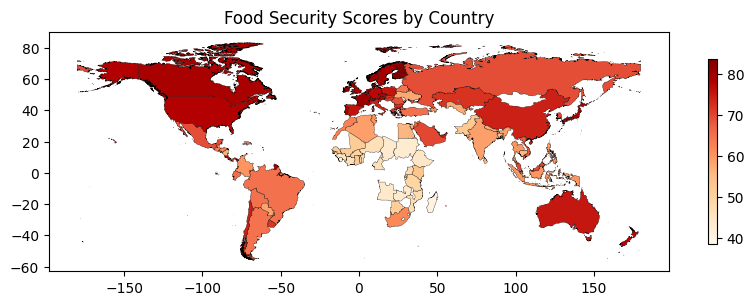

In [40]:
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Create figure and axis to control size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot food security scores
foodsec.plot(column='Overall score', cmap='OrRd', legend=True,
             edgecolor='black',
             linewidth=0.2,
             legend_kwds={
                 'shrink': 0.3,
             },ax=ax,)

# Formatting
ax.set_title('Food Security Scores by Country')
plt.savefig('food_security_choropleth.png')
plt.show()


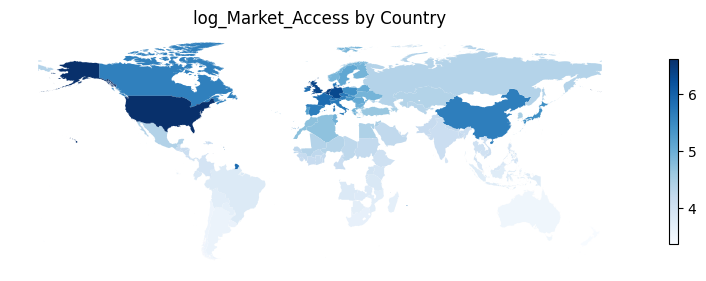

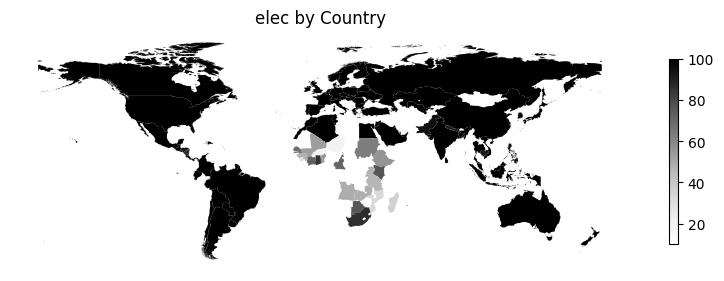

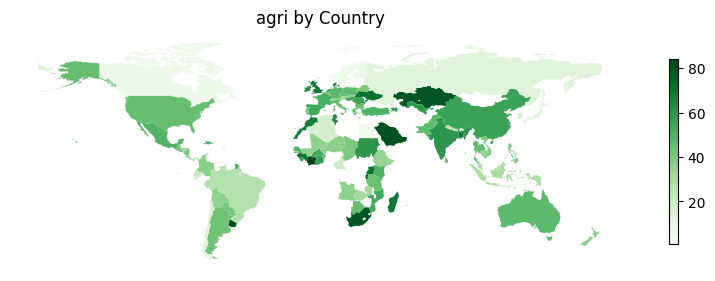

In [41]:
# Define variables for plotting
plot_vars = ['log_Market_Access', 'elec', 'agri']
cmaps = ['Blues','Greys', 'Greens']  # Distinct colormaps

for col, cmap in zip(plot_vars, cmaps):
    if not isinstance(foodsec, gpd.GeoDataFrame):
        foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the data
    foodsec.plot(
        column=col,
        cmap=cmap,
        legend=True,
        ax=ax,
        linewidth=0.2,
        legend_kwds={'shrink': 0.3}
    )

    # Formatting
    ax.set_title(f"{col} by Country")
    ax.set_axis_off()
    plt.savefig(f"{col}_choropleth.png")
    plt.show()


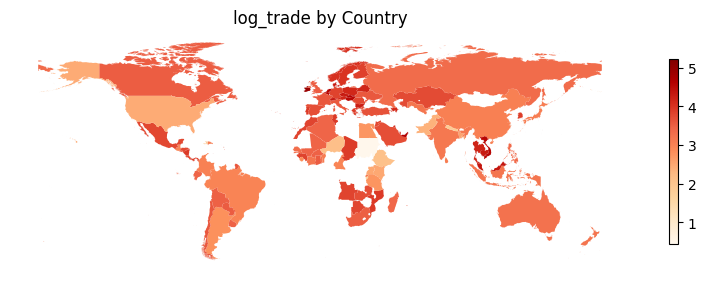

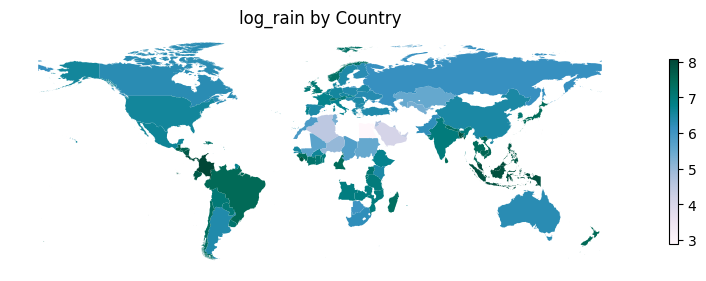

In [42]:
import numpy as np

if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Ensure no zero or negative values before log transformation
foodsec['log_trade'] = np.log(foodsec['trade'].replace(0, np.nan))
foodsec['log_rain'] = np.log(foodsec['rain'].replace(0, np.nan))

log_vars = ['log_trade', 'log_rain']
cmaps = ['OrRd', 'PuBuGn']  # Distinct colormaps

for col, cmap in zip(log_vars, cmaps):
    fig, ax = plt.subplots(figsize=(10, 8))

    foodsec.plot(
        column=col,
        cmap=cmap,
        legend=True,
        ax=ax,
        linewidth=0.2,
        legend_kwds={'shrink': 0.3}
    )

    ax.set_title(f"{col} by Country")
    ax.set_axis_off()
    plt.savefig(f"{col}_choropleth.png")
    plt.show()


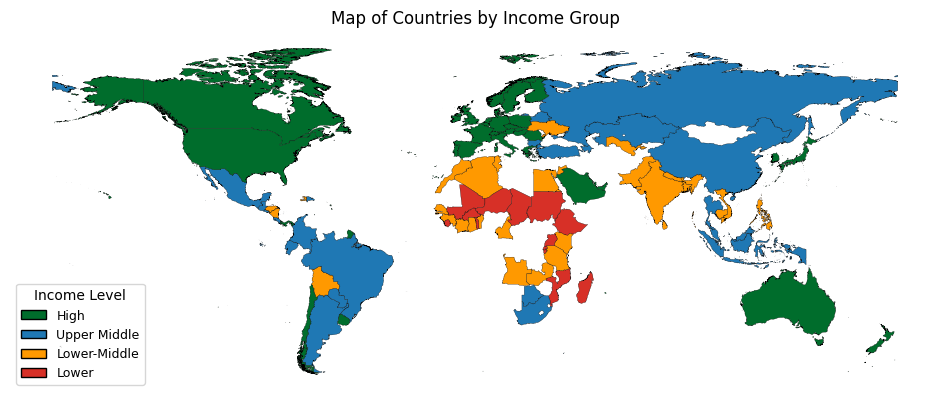

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

# Ensure foodsec is a GeoDataFrame
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Function to assign income labels based on binary indicators
def get_income_label(row):
    if row['income_H'] == 1:
        return "High"
    elif row['income_UM'] == 1:
        return "Upper Middle"
    elif row['income_LM'] == 1:
        return "Lower-Middle"
    elif row['income_L'] == 1:
        return "Lower"
    else:
        return "Unknown"

# Create a new column with human-readable income labels
foodsec['Income_Label'] = foodsec.apply(get_income_label, axis=1)

# Define visually appealing colors for each income category
colors = {
    "High": "#006d2c",          # Deep Green
    "Upper Middle": "#1f78b4",  # Rich Blue
    "Lower-Middle": "#ff9900",  # Vibrant Orange
    "Lower": "#d73027",         # Strong Red
    "Unknown": "#bdbdbd"        # Neutral Grey
}

# Map colors to the dataset
foodsec['color'] = foodsec['Income_Label'].map(colors)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 9))
foodsec.plot(color=foodsec['color'], edgecolor='black', linewidth=0.2, ax=ax)
ax.set_title("Map of Countries by Income Group")
ax.set_axis_off()

# Build a legend with custom color patches
legend_elements = [Patch(facecolor=colors[label], edgecolor='black', label=label)
                   for label in colors if label != "Unknown"]

ax.legend(handles=legend_elements, title="Income Level", loc='lower left', prop={'size': 9}, markerscale=0.7)
plt.show()


# **PLACE HOLDER**

#### **Scatter Plots just to see the relationship better**

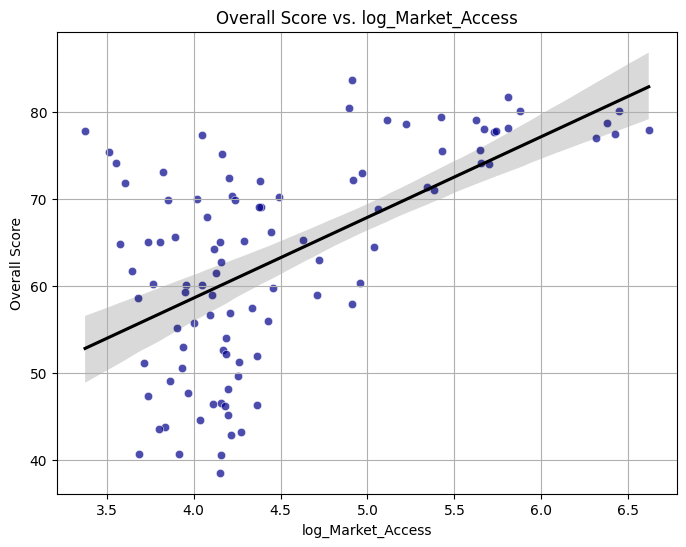

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dataset is correct
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Scatter plot for Overall Score vs. log_Market_Access
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=foodsec, x='log_Market_Access', y='Overall score', alpha=0.7, color='darkblue', ax=ax)
sns.regplot(data=foodsec, x='log_Market_Access', y='Overall score', scatter=False, color='black', ax=ax)  # Trendline

# Formatting
ax.set_title("Overall Score vs. log_Market_Access")
ax.set_xlabel("log_Market_Access")
ax.set_ylabel("Overall Score")
ax.grid(True)

plt.savefig("scatter_log_market_access.png")
plt.show()


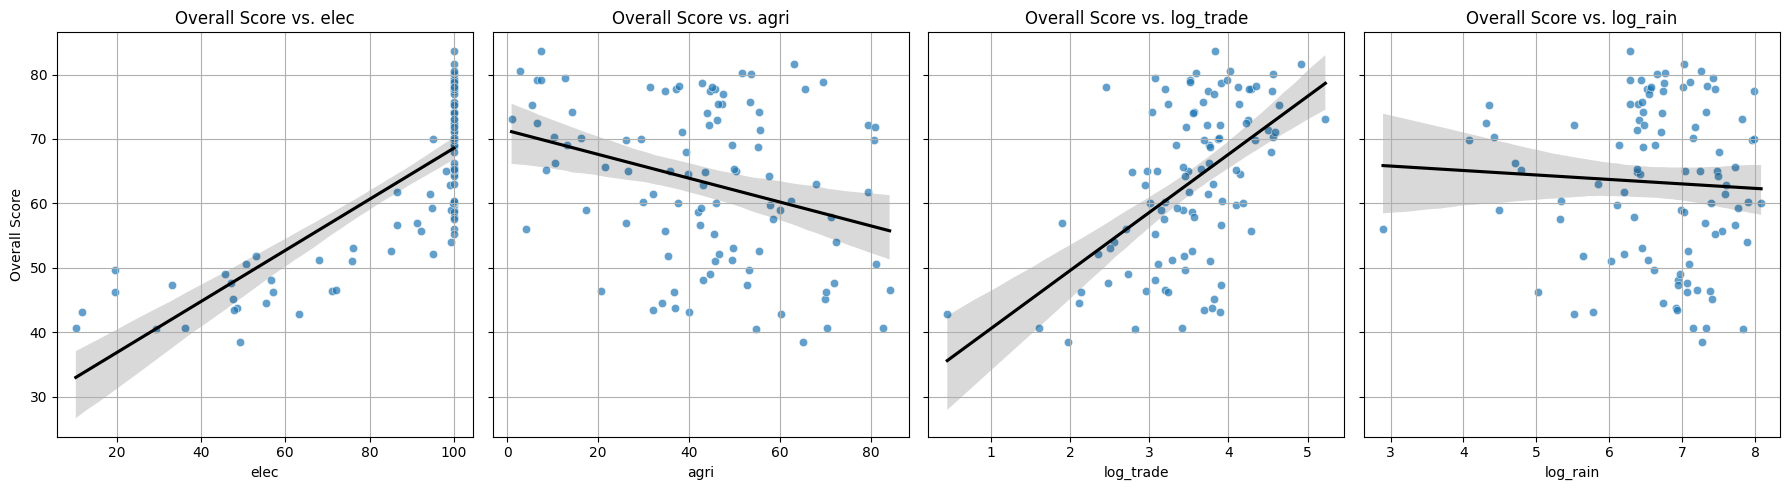

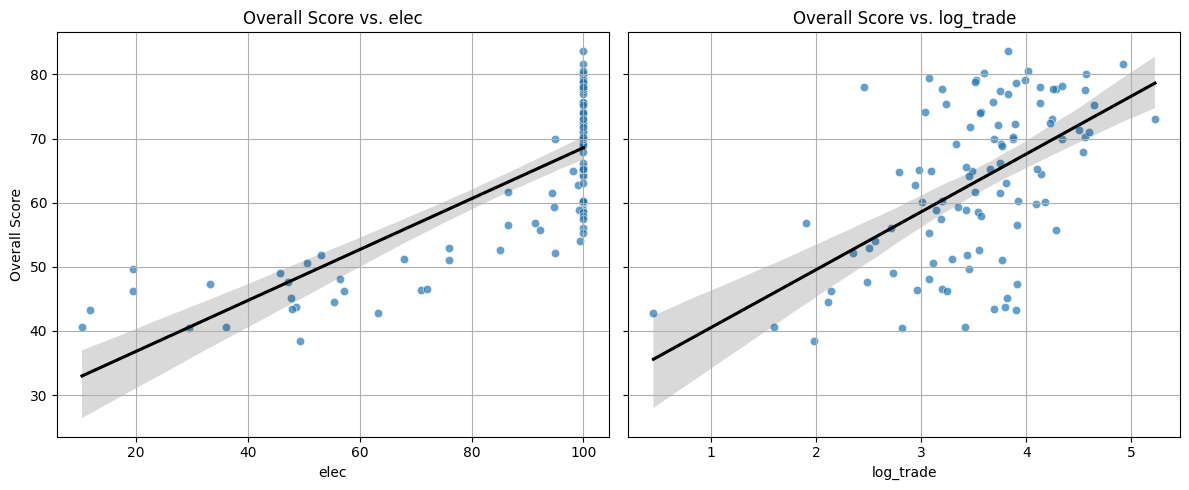

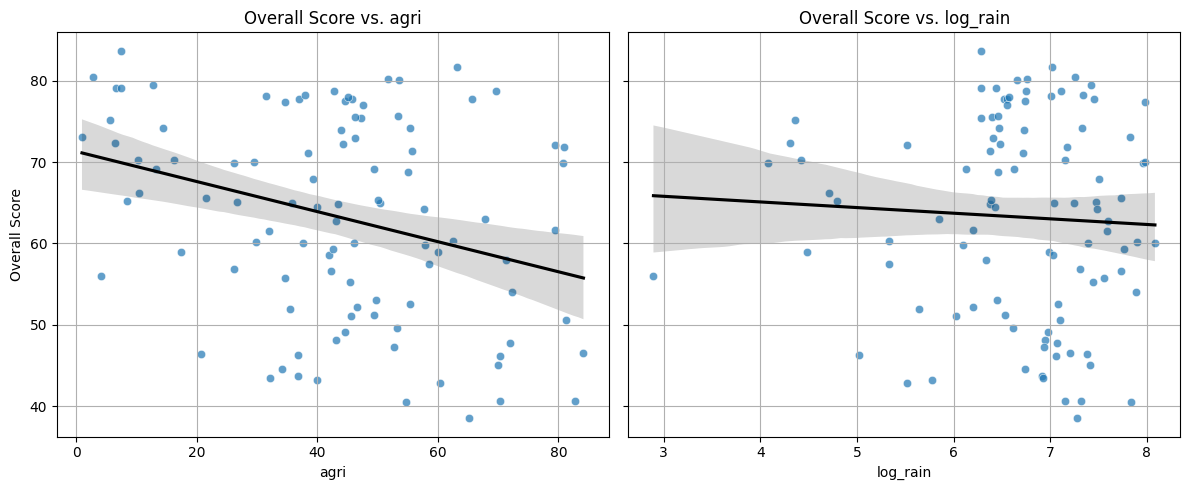

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dataset is a GeoDataFrame
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Define secondary predictors
secondary_vars = ['elec', 'agri', 'log_trade', 'log_rain']
num_vars = len(secondary_vars)

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, num_vars, figsize=(18, 5), sharey=True)

# Generate individual scatter plots with trendlines
for i, col in enumerate(secondary_vars):
    sns.scatterplot(data=foodsec, x=col, y='Overall score', alpha=0.7, ax=axes[i])
    sns.regplot(data=foodsec, x=col, y='Overall score', scatter=False, color='black', ax=axes[i])  # Trendline
    axes[i].set_title(f"Overall Score vs. {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Set common y-label for readability
axes[0].set_ylabel("Overall Score")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("scatter_secondary_combined.png")
plt.show()

# 2x2
import matplotlib.pyplot as plt
import seaborn as sns

# First 1x2: elec and log_trade
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
vars1 = ['elec', 'log_trade']

for i, col in enumerate(vars1):
    sns.scatterplot(data=foodsec, x=col, y='Overall score', alpha=0.7, ax=axes[i])
    sns.regplot(data=foodsec, x=col, y='Overall score', scatter=False, color='black', ax=axes[i])
    axes[i].set_title(f"Overall Score vs. {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)

axes[0].set_ylabel("Overall Score")
plt.tight_layout()
plt.savefig("scatter_elec_logtrade.png", dpi=300, bbox_inches='tight')
plt.show()

# Second 1x2: agri and log_rain
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
vars2 = ['agri', 'log_rain']

for i, col in enumerate(vars2):
    sns.scatterplot(data=foodsec, x=col, y='Overall score', alpha=0.7, ax=axes[i])
    sns.regplot(data=foodsec, x=col, y='Overall score', scatter=False, color='black', ax=axes[i])
    axes[i].set_title(f"Overall Score vs. {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)

axes[0].set_ylabel("Overall Score")
plt.tight_layout()
plt.savefig("scatter_agri_lograin.png", dpi=300, bbox_inches='tight')
plt.show()



**Checking correlation between % of agriculturable land and income group.**
- After checking why electricity and overall score has a negative relationship, it's more like electricity represents development of a country which is better explained by income groups.
- We will remove elec from the regression model to avoid multicollinearity and have better standard errors

In [46]:
#######################
import pandas as pd

# Ensure dataset is a GeoDataFrame
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# Select relevant variables
corr_vars = ['income_L', 'income_LM', 'income_UM', 'income_H', 'agri', 'Overall score', 'elec']

# Compute correlation matrix
corr_matrix = foodsec[corr_vars].corr()

# Extract correlations for income groups vs. agri & elec
corr_vector = corr_matrix.loc[['income_L', 'income_LM', 'income_UM', 'income_H'], ['Overall score', 'elec']]

# Display correlation table in 4x2 format
print(corr_vector)


# Elec only
corr_vars = ['income_L', 'income_LM', 'income_UM', 'income_H', 'elec']

# Compute correlation matrix
corr_matrix = foodsec[corr_vars].corr()

# Extract correlations for income groups vs. agri & elec
corr_vector = corr_matrix.loc[['income_L', 'income_LM', 'income_UM', 'income_H'], ['elec']]

# Display correlation table in 4x2 format
print(corr_vector)

#####3
import pandas as pd
import geopandas as gpd
from tabulate import tabulate

# Ensure GeoDataFrame
if not isinstance(foodsec, gpd.GeoDataFrame):
    foodsec = gpd.GeoDataFrame(foodsec, geometry='geometry')

# === Correlation with Overall Score & Elec ===
corr_vars = ['income_L', 'income_LM', 'income_UM', 'income_H', 'Overall score', 'elec']
corr_matrix = foodsec[corr_vars].corr()
corr_vector = corr_matrix.loc[['income_L', 'income_LM', 'income_UM', 'income_H'], ['Overall score', 'elec']]

# Format and print as table
print("\n=== Correlation of Income Groups with Overall Score & Electricity ===")
print(tabulate(corr_vector.round(3), headers='keys', tablefmt='fancy_grid', showindex=True))

# === Correlation with Elec Only ===
corr_vars_elec = ['income_L', 'income_LM', 'income_UM', 'income_H', 'elec']
corr_matrix_elec = foodsec[corr_vars_elec].corr()
corr_vector_elec = corr_matrix_elec.loc[['income_L', 'income_LM', 'income_UM', 'income_H'], ['elec']]

# Format and print as table
print("\n=== Correlation of Income Groups with Electricity Only ===")
print(tabulate(corr_vector_elec.round(3), headers='keys', tablefmt='fancy_grid', showindex=True))



           Overall score      elec
income_L       -0.562106 -0.795452
income_LM      -0.458654 -0.084154
income_UM       0.083035  0.256457
income_H        0.755752  0.415547
               elec
income_L  -0.795452
income_LM -0.084154
income_UM  0.256457
income_H   0.415547

=== Correlation of Income Groups with Overall Score & Electricity ===
╒═══════════╤═════════════════╤════════╕
│           │   Overall score │   elec │
╞═══════════╪═════════════════╪════════╡
│ income_L  │          -0.562 │ -0.795 │
├───────────┼─────────────────┼────────┤
│ income_LM │          -0.459 │ -0.084 │
├───────────┼─────────────────┼────────┤
│ income_UM │           0.083 │  0.256 │
├───────────┼─────────────────┼────────┤
│ income_H  │           0.756 │  0.416 │
╘═══════════╧═════════════════╧════════╛

=== Correlation of Income Groups with Electricity Only ===
╒═══════════╤════════╕
│           │   elec │
╞═══════════╪════════╡
│ income_L  │ -0.795 │
├───────────┼────────┤
│ income_LM │ -0.084 │
├────

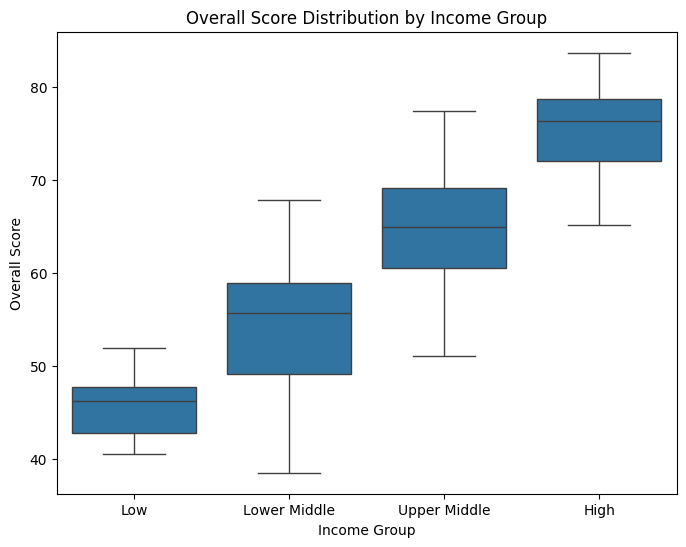

In [47]:
# Create the 'Income Group' column based on your income dummies:
# Assume foodsec has dummy columns: income_L, income_LM, income_UM.
# Rows where none of these are 1 (or all are 0) will be treated as "High" income.
def get_income_group(row):
    if row['income_L'] == 1:
        return 'Low'
    elif row['income_LM'] == 1:
        return 'Lower Middle'
    elif row['income_UM'] == 1:
        return 'Upper Middle'
    else:
        return 'High'

foodsec['Income Group'] = foodsec.apply(get_income_group, axis=1)

# Create the boxplot with Seaborn:
plt.figure(figsize=(8, 6))
order = ['Low', 'Lower Middle', 'Upper Middle', 'High']
sns.boxplot(x='Income Group', y='Overall score', data=foodsec, order=order)
plt.title('Overall Score Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Overall Score')
plt.show()

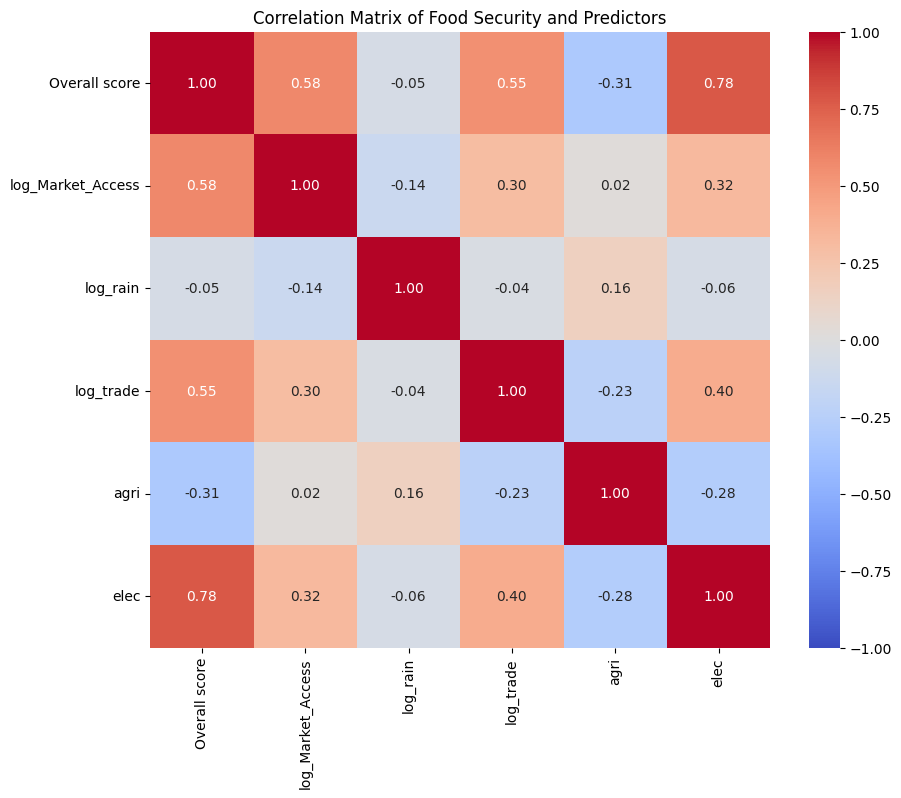

In [48]:
import matplotlib.pyplot as plt
import seaborn as sb

# Select variables for correlation
corr_vars = ['Overall score', 'log_Market_Access', 'log_rain', 'log_trade', 'agri', 'elec']
corr_matrix = foodsec[corr_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix of Food Security and Predictors')
plt.savefig('correlation_matrix_foodsec.png')
plt.show()

# **Part 2: Regression with Robust Standard Errors (NEW)**


In [49]:
cols = [
    'Country',
    'Overall score',
    'Weighted Average',
    'Market Access',
    'income_L',
    'income_LM',
    'income_UM',
    'income_H',
    'geometry',
    'rain',
    'agri',
    'trade',
    'elec'
]
foodsec = food5[cols].copy()
foodsec['log_Market_Access'] = np.log(foodsec['Market Access'])
foodsec['log_trade'] = np.log(foodsec['trade'].replace(0, np.nan))
foodsec['log_rain'] = np.log(foodsec['rain'].replace(0, np.nan))
foodsec

Country  Overall score  Weighted Average  Market Access  income_L  \
0         Algeria           58.9       5958.210208     111.328629       0.0   
1          Angola           43.7      10089.417624      46.332039       0.0   
2       Argentina           64.8      12305.199332      35.726990       0.0   
3       Australia           75.4      13448.413965      33.517659       0.0   
4         Austria           78.1       4466.288138     290.224170       0.0   
..            ...            ...               ...            ...       ...   
95  United States           78.0       5492.892791     747.551156       0.0   
96        Uruguay           71.8      11967.155149      36.747703       0.0   
97     Uzbekistan           57.5       6415.239797      76.572794       0.0   
98        Vietnam           67.9       9254.414222      59.102038       0.0   
99         Zambia           43.5      10416.386168      44.658781       0.0   

    income_LM  income_UM  income_H  \
0         1.0        0.0       0.0   
1         1.0        0.0       0.0   
2         0.0        1.0       0.0   
3         0.0        0.0       1.0   
4         0.0        0.0       1.0   
..        ...        ...       ...   
95        0.0        0.0       1.0   
96        0.0        0.0       1.0   
97        1.0        0.0       0.0   
98        1.0        0.0       0.0   
99        1.0        0.0       0.0   

                                             geometry    rain       agri  \
0   POLYGON ((-4.821613117999902 24.99506459600009...    89.0  17.344506   
1   MULTIPOLYGON (((13.073702840000067 -4.63532318...  1010.0  36.814791   
2   MULTIPOLYGON (((-67.19390417499997 -22.8222234...   591.0  43.427782   
3   MULTIPOLYGON (((131.53589928500003 -31.6055640...   534.0  47.259237   
4   POLYGON ((16.945042766000142 48.60416615800007...  1110.0  31.476584   
..                                                ...     ...        ...   
95  MULTIPOLYGON (((-122.75301682799991 48.9925145...   715.0  45.085151   
96  POLYGON ((-57.602792548565105 -30.190516953885...  1300.0  80.873529   
97  MULTIPOLYGON (((71.7855196540001 39.9897048950...   206.0  58.479253   
98  MULTIPOLYGON (((107.52039270000006 14.70458160...  1821.0  39.291195   
99  POLYGON ((32.9208634850001 -9.407900085999913,...  1020.0  32.067959   

        trade   elec  log_Market_Access  log_trade  log_rain  
0   30.808979  100.0           4.712486   3.427806  4.488636  
1   44.391642   48.5           3.835834   3.793051  6.917706  
2   16.248014  100.0           3.575906   2.787971  6.381816  
3   25.531588  100.0           3.512072   3.239916  6.280396  
4   61.962673  100.0           5.670654   4.126532  7.012115  
..        ...    ...                ...        ...       ...  
95  11.602228  100.0           6.616803   2.451197  6.572283  
96  31.952165  100.0           3.604076   3.464240  7.170120  
97  24.332176  100.0           4.338242   3.191800  5.327876  
98  93.811638  100.0           4.079265   4.541289  7.507141  
99  40.193998   47.8           3.799051   3.693718  6.927558  

[100 rows x 16 columns]

In [50]:
# Define the independent variables (removing 'elec')
independent_vars = [
    'log_Market_Access',
    'income_L',
    'income_LM',
    'income_UM',
    'log_rain',
    'agri',
    'log_trade'
]

# Dependent variable
y = foodsec['Overall score']

# Build the independent variables DataFrame and add a constant term
X = foodsec[independent_vars]
X = sm.add_constant(X)

# Fit the OLS model with robust (HC3) standard errors
robust_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          Overall score   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           6.03e-44
Time:                        02:18:44   Log-Likelihood:                -302.11
No. Observations:                 100   AIC:                             620.2
Df Residuals:                      92   BIC:                             641.1
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.0878      6.67

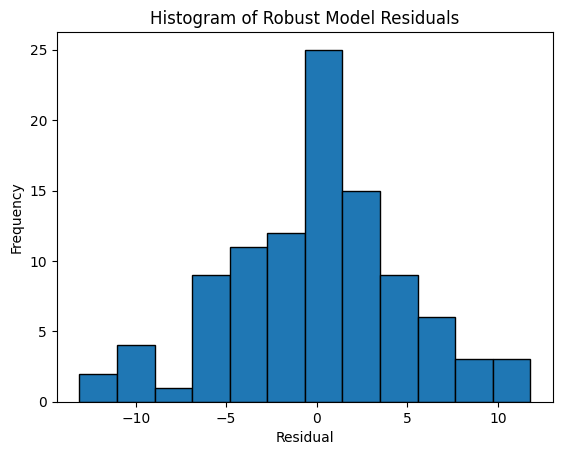

Shapiro-Wilk test: Statistic=0.9864, p-value=0.3986
Residuals appear normally distributed.


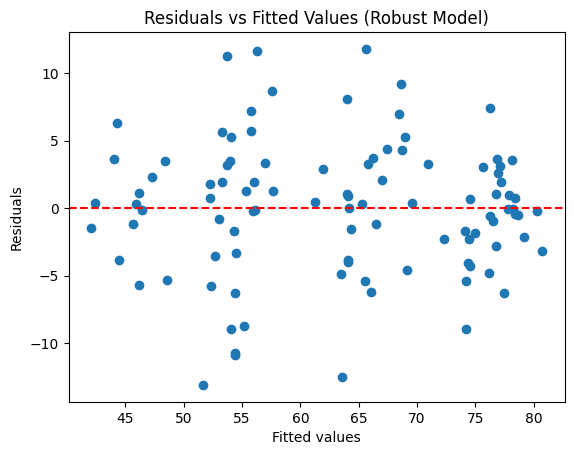

Lagrange multiplier statistic: 16.1889
p-value: 0.0234
f-value: 2.5387
f p-value: 0.0196
Heteroscedasticity detected (non-constant variance).


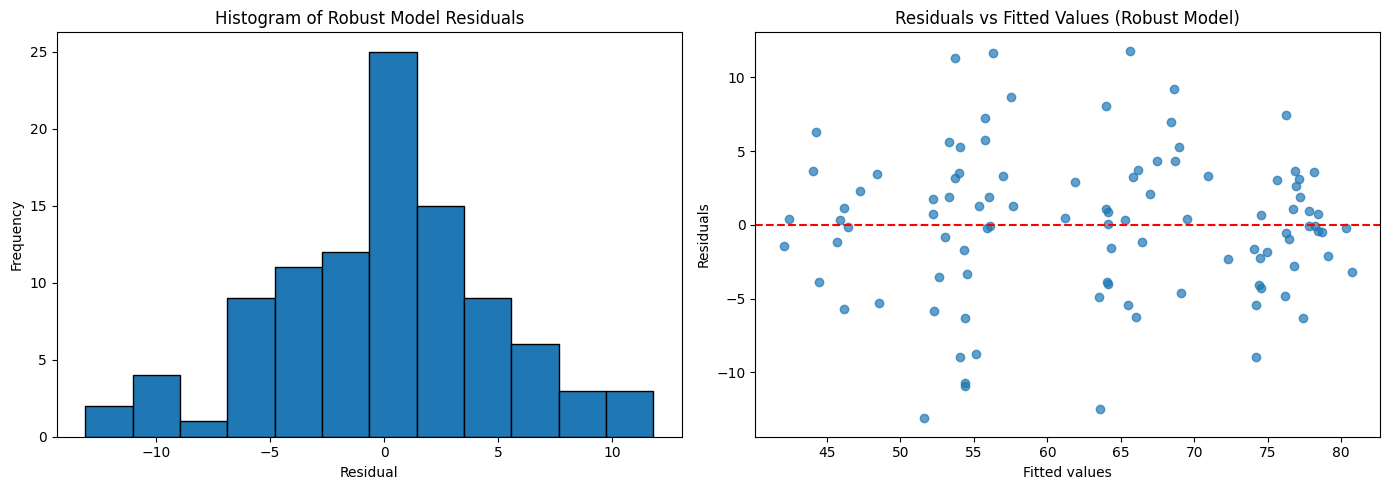

Shapiro-Wilk test: Statistic=0.9864, p-value=0.3986
Residuals appear normally distributed.
Lagrange multiplier statistic: 16.1889
p-value: 0.0234
f-value: 2.5387
f p-value: 0.0196
Heteroscedasticity detected (non-constant variance).


In [51]:
# Residual Diagnostics: Histogram of Residuals
residuals = robust_model.resid
plt.hist(residuals, bins=12, edgecolor='black')
plt.title('Histogram of Robust Model Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Normality Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

# Residuals vs Fitted Values Plot
fitted_vals = robust_model.fittedvalues
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Robust Model)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Breusch-Pagan Test for Heteroskedasticity
bp_test = het_breuschpagan(residuals, robust_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')
if bp_test[1] < 0.05:
    print("Heteroscedasticity detected (non-constant variance).")
else:
    print("No evidence of heteroscedasticity (homoscedastic residuals).")

import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

# Extract residuals and fitted values
residuals = robust_model.resid
fitted_vals = robust_model.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=12, edgecolor='black')
axes[0].set_title('Histogram of Robust Model Residuals')
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Frequency')

# Residuals vs Fitted Values plot
axes[1].scatter(fitted_vals, residuals, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Fitted Values (Robust Model)')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Normality Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

# Breusch-Pagan Test for Heteroskedasticity
bp_test = het_breuschpagan(residuals, robust_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')
if bp_test[1] < 0.05:
    print("Heteroscedasticity detected (non-constant variance).")
else:
    print("No evidence of heteroscedasticity (homoscedastic residuals).")



In [52]:
# Assume foodsec is your DataFrame and y is defined as follows:
y = foodsec['Overall score']

# Define a list of model specifications using the updated variable names.
model_specs = [
    # Model 1: Just log_Market_Access
    ['log_Market_Access'],

    # Model 2: log_Market_Access + all income dummies (excluding income_H as reference)
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM'],

    # Model 3: Add log_rain
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain'],

    # Model 4: Add agri
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain', 'agri'],

    # Model 5: Add log_trade (full specification)
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain', 'agri', 'log_trade']
]

# Fit each model with robust standard errors (HC3)
results = []
for spec in model_specs:
    # Create the independent variable DataFrame for this specification and add a constant.
    X_spec = sm.add_constant(foodsec[spec])
    # Fit the model with robust standard errors.
    mdl = sm.OLS(y, X_spec).fit(cov_type='HC3')
    results.append(mdl)

# Give each model a name for clarity.
model_names = [f"Model {i+1}" for i in range(len(results))]

# Optional: Display sample size (N); you can add R² if desired.
info_dict = {'N': lambda x: f"{int(x.nobs)}"}

# Print the side‐by‐side table of coefficient estimates using summary_col.
print(summary_col(
    results,
    stars=True,
    float_format='%0.3f',
    model_names=model_names,
    info_dict=info_dict
))
print("Robust Standard Errors used.")


                   Model 1   Model 2    Model 3    Model 4    Model 5  
-----------------------------------------------------------------------
const             21.403*** 59.359***  59.625***  58.247***  53.088*** 
                  (5.695)   (3.782)    (5.178)    (5.432)    (6.672)   
log_Market_Access 9.299***  3.186***   3.181***   3.604***   3.515***  
                  (1.113)   (0.688)    (0.691)    (0.782)    (0.840)   
income_L                    -26.850*** -26.852*** -25.275*** -23.807***
                            (1.544)    (1.561)    (1.791)    (2.274)   
income_LM                   -18.232*** -18.230*** -17.373*** -16.554***
                            (1.620)    (1.636)    (1.734)    (1.956)   
income_UM                   -7.559***  -7.547***  -6.809***  -6.342*** 
                            (1.532)    (1.566)    (1.650)    (1.838)   
log_rain                               -0.037     0.160      0.155     
                                       (0.537)    (0.535)    (0

In [53]:
# RELAPSE
# 1) Build your Stargazer object as usual
stargazer = Stargazer(results)
stargazer.title('Regression Results with Robust Standard Errors')
stargazer.custom_columns(model_names, [1] * len(results))

# 2) Specify the exact order you want your rows in.
#    Use the updated variable names.
stargazer.covariate_order([
    'const',            # Intercept
    'log_Market_Access',
    'income_L',
    'income_LM',
    'income_UM',
    'log_rain',
    'agri',
    'log_trade'
])

# 3) Render HTML
html = stargazer.render_html()

# 4a) To display inline in a Jupyter Notebook:
display(HTML(html))

# 4b) Or write it out to a standalone file:
with open('final_model_results.html', 'w', encoding='utf-8') as f:
    f.write(html)
print("Wrote table to final_model_results.html")
print("Robust Standard Errors Used")

Wrote table to final_model_results.html
Robust Standard Errors Used


In [54]:
# Saved for Finals

In [55]:
cols = [
    'Country',
    'Overall score',
    'Weighted Average',
    'Market Access',
    'income_L',
    'income_LM',
    'income_UM',
    'income_H',
    'geometry',
    'rain',
    'agri',
    'trade',
    'elec'
]
foodsec = food5[cols].copy()
foodsec['log_Market_Access'] = np.log(foodsec['Market Access'])
foodsec['log_trade'] = np.log(foodsec['trade'].replace(0, np.nan))
foodsec['log_rain'] = np.log(foodsec['rain'].replace(0, np.nan))
foodsec

Country  Overall score  Weighted Average  Market Access  income_L  \
0         Algeria           58.9       5958.210208     111.328629       0.0   
1          Angola           43.7      10089.417624      46.332039       0.0   
2       Argentina           64.8      12305.199332      35.726990       0.0   
3       Australia           75.4      13448.413965      33.517659       0.0   
4         Austria           78.1       4466.288138     290.224170       0.0   
..            ...            ...               ...            ...       ...   
95  United States           78.0       5492.892791     747.551156       0.0   
96        Uruguay           71.8      11967.155149      36.747703       0.0   
97     Uzbekistan           57.5       6415.239797      76.572794       0.0   
98        Vietnam           67.9       9254.414222      59.102038       0.0   
99         Zambia           43.5      10416.386168      44.658781       0.0   

    income_LM  income_UM  income_H  \
0         1.0        0.0       0.0   
1         1.0        0.0       0.0   
2         0.0        1.0       0.0   
3         0.0        0.0       1.0   
4         0.0        0.0       1.0   
..        ...        ...       ...   
95        0.0        0.0       1.0   
96        0.0        0.0       1.0   
97        1.0        0.0       0.0   
98        1.0        0.0       0.0   
99        1.0        0.0       0.0   

                                             geometry    rain       agri  \
0   POLYGON ((-4.821613117999902 24.99506459600009...    89.0  17.344506   
1   MULTIPOLYGON (((13.073702840000067 -4.63532318...  1010.0  36.814791   
2   MULTIPOLYGON (((-67.19390417499997 -22.8222234...   591.0  43.427782   
3   MULTIPOLYGON (((131.53589928500003 -31.6055640...   534.0  47.259237   
4   POLYGON ((16.945042766000142 48.60416615800007...  1110.0  31.476584   
..                                                ...     ...        ...   
95  MULTIPOLYGON (((-122.75301682799991 48.9925145...   715.0  45.085151   
96  POLYGON ((-57.602792548565105 -30.190516953885...  1300.0  80.873529   
97  MULTIPOLYGON (((71.7855196540001 39.9897048950...   206.0  58.479253   
98  MULTIPOLYGON (((107.52039270000006 14.70458160...  1821.0  39.291195   
99  POLYGON ((32.9208634850001 -9.407900085999913,...  1020.0  32.067959   

        trade   elec  log_Market_Access  log_trade  log_rain  
0   30.808979  100.0           4.712486   3.427806  4.488636  
1   44.391642   48.5           3.835834   3.793051  6.917706  
2   16.248014  100.0           3.575906   2.787971  6.381816  
3   25.531588  100.0           3.512072   3.239916  6.280396  
4   61.962673  100.0           5.670654   4.126532  7.012115  
..        ...    ...                ...        ...       ...  
95  11.602228  100.0           6.616803   2.451197  6.572283  
96  31.952165  100.0           3.604076   3.464240  7.170120  
97  24.332176  100.0           4.338242   3.191800  5.327876  
98  93.811638  100.0           4.079265   4.541289  7.507141  
99  40.193998   47.8           3.799051   3.693718  6.927558  

[100 rows x 16 columns]

In [56]:
## LINEAR REGRESSION
# Define the independent variables
independent_vars = [
    #'Weighted Average',
    #'Market Access',
    'log_Market_Access',
    'income_L',
    'income_LM',
    'income_UM',
    #'income_H', # This is the reference variable within income groups (abritrarily chosen, depends on stats ig, other good choice is income_L)
    #'rain',
    'log_rain',
    'agri',
    #'trade',
    'log_trade',
    #'elec'
]

# Dependent variable
y = foodsec['Overall score']
#y = np.log(foodsec['Overall score'])
#y = food['Inflation'] #can be another indicator for food security

# Independent variables DataFrame, add a constant term for intercept
X = foodsec[independent_vars]
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overall score   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     66.23
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           3.63e-33
Time:                        02:18:45   Log-Likelihood:                -302.11
No. Observations:                 100   AIC:                             620.2
Df Residuals:                      92   BIC:                             641.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.0878      6.62

## **Residual and Post Diagnostics**

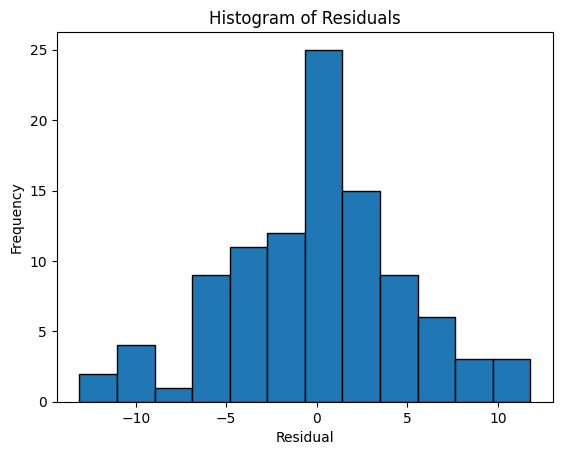

Shapiro-Wilk test: Statistic=0.9864, p-value=0.3986
Residuals appear normally distributed.


In [57]:
# Residual Diagnostics
residuals = model.resid
plt.hist(residuals, bins=12, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Formal Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

**Note**
If they’re normally distributed: Your model is likely unbiased and well-specifie



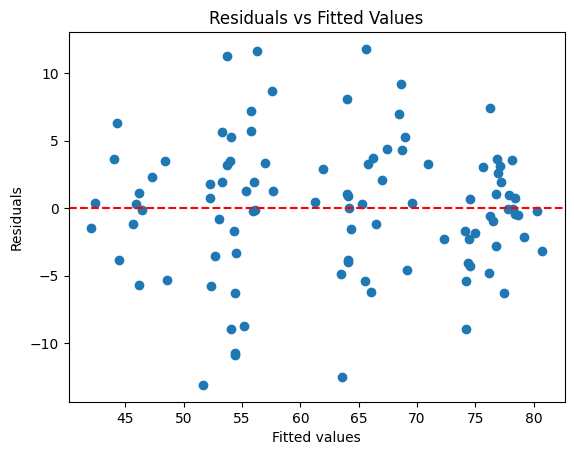

Lagrange multiplier statistic: 16.1889
p-value: 0.0234
f-value: 2.5387
f p-value: 0.0196
Heteroscedasticity detected (non-constant variance).


In [58]:
# Heteroskedasticity Check: Scatter should center around zero
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Formal Test
# y = dependent var, X = independent vars (with constant added)
bp_test = het_breuschpagan(residuals, model.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value',
          'f-value', 'f p-value']

for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')

# Interpret p-value
if bp_test[1] < 0.05:
    print("Heteroscedasticity detected (non-constant variance).")
else:
    print("No evidence of heteroscedasticity (homoscedastic residuals).")


## **Other Models for Completeness' Sake**

In [59]:
# Your dependent‐variable options (keep commented ones for reference)
y = foodsec['Overall score'] #MAIN ONE
# y = np.log(foodsec['Overall score'])
# y = food['Inflation']

# define each “step” of IVs in order
model_specs = [
    # 1) just Market Access
    ['Market Access'],

    # 2) Market Access + all income dummies (excluding income_H as reference)
    ['Market Access', 'income_L', 'income_LM', 'income_UM'],

    # 3) add rain
    ['Market Access', 'income_L', 'income_LM', 'income_UM', 'rain'],

    # 4) add agri
    ['Market Access', 'income_L', 'income_LM', 'income_UM', 'rain', 'agri'],

    # 5) add trade
    ['Market Access', 'income_L', 'income_LM', 'income_UM', 'rain', 'agri', 'trade'],

    # 6) add elec (full spec)
    ['Market Access', 'income_L', 'income_LM', 'income_UM', 'rain', 'agri', 'trade', 'elec'],
]

results = []
for spec in model_specs:
    X = sm.add_constant(foodsec[spec])
    mdl = sm.OLS(y, X).fit()
    results.append(mdl)

# give each column a name
model_names = [f"Model {i+1}" for i in range(len(results))]

# optional: show sample size & R² in the bottom
info_dict = {
    'N': lambda x: f"{int(x.nobs)}"#,
    #'R²': lambda x: f"{x.rsquared:.3f}"
}

# print side‐by‐side table of coefficient estimates
print(summary_col(
    results,
    stars=True,
    float_format='%0.3f',
    model_names=model_names,
    info_dict=info_dict
))



                Model 1   Model 2    Model 3    Model 4    Model 5    Model 6  
-------------------------------------------------------------------------------
const          57.162*** 72.361***  72.399***  73.868***  72.304***  47.619*** 
               (1.404)   (1.408)    (1.642)    (1.782)    (2.249)    (3.819)   
Market Access  0.047***  0.014***   0.014***   0.016***   0.016***   0.014***  
               (0.007)   (0.005)    (0.005)    (0.005)    (0.005)    (0.004)   
income_L                 -27.670*** -27.673*** -26.073*** -25.238*** -10.503***
                         (1.927)    (1.939)    (2.077)    (2.200)    (2.670)   
income_LM                -18.814*** -18.811*** -17.883*** -17.227*** -13.717***
                         (1.549)    (1.559)    (1.607)    (1.705)    (1.442)   
income_UM                -8.255***  -8.245***  -7.396***  -6.882***  -6.988*** 
                         (1.634)    (1.659)    (1.691)    (1.747)    (1.394)   
rain                                -0.

In [60]:
# Your dependent‐variable options (keep commented ones for reference)
y = foodsec['Overall score']  # MAIN ONE
# y = np.log(foodsec['Overall score'])
# y = food['Inflation']

# Define each “step” of IVs in order using the updated variable names:
model_specs = [
    # 1) Just Market Access (log-transformed)
    ['log_Market_Access'],

    # 2) log_Market_Access + all income dummies (excluding income_H as reference)
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM'],

    # 3) Add rain (log-transformed)
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain'],

    # 4) Add agri
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain', 'agri'],

    # 5) Add trade (log-transformed; full specification)
    ['log_Market_Access', 'income_L', 'income_LM', 'income_UM', 'log_rain', 'agri', 'log_trade'],
]

results = []
for spec in model_specs:
    X = sm.add_constant(foodsec[spec])
    mdl = sm.OLS(y, X).fit()
    results.append(mdl)

# Give each column a name
model_names = [f"Model {i+1}" for i in range(len(results))]

# Optional: show sample size & R² in the bottom
info_dict = {
    'N': lambda x: f"{int(x.nobs)}"  # ,
    #'R²': lambda x: f"{x.rsquared:.3f}"
}

# Print side‐by‐side table of coefficient estimates using summary_col
print(summary_col(
    results,
    stars=True,
    float_format='%0.3f',
    model_names=model_names,
    info_dict=info_dict
))


                   Model 1   Model 2    Model 3    Model 4    Model 5  
-----------------------------------------------------------------------
const             21.403*** 59.359***  59.625***  58.247***  53.088*** 
                  (5.994)   (4.380)    (5.967)    (5.909)    (6.629)   
log_Market_Access 9.299***  3.186***   3.181***   3.604***   3.515***  
                  (1.313)   (0.844)    (0.852)    (0.864)    (0.857)   
income_L                    -26.850*** -26.852*** -25.275*** -23.807***
                            (1.905)    (1.916)    (2.038)    (2.204)   
income_LM                   -18.232*** -18.230*** -17.373*** -16.554***
                            (1.514)    (1.522)    (1.556)    (1.619)   
income_UM                   -7.559***  -7.547***  -6.809***  -6.342*** 
                            (1.614)    (1.632)    (1.646)    (1.655)   
log_rain                               -0.037     0.160      0.155     
                                       (0.560)    (0.560)    (0

### **Saving to HTML**

# **EDA WRITINGS**
Before proceeding with the regression model, Exploratory Data Analysis (EDA) is conducted to understand key patterns, distributions, and relationships among the variables influencing food security.

#### **Geospatial Analysis from the Choropleth Maps**

**Food Security Scores, Market Access by Country**
- Countries with relatively higher food security scores tend to be located on the northern hemispheres of the Americas and European Region. The highest percentiles of food security are countries that are themselves or surrounded by the part of the top 10 food exporters globally. Countries with higher market access values (meaning they are closer to top food exporters) are also on similar geographic locations. It is worth noting that there are a few countries in located away from the top 10 food exporters that have decent food security scores possibly by other factors.

**Trade Reliance, Electricity Access on Food Security**
- Visually, dependence on trade seem to center being indifferent or lower scores for food security. This could mean that increasing trade activity may not necessarily improve food security. For most countries, they have almost 100% electricity access for their population. Notably, countries with less than 100%, located geographically in the middle east, exhibit significantly lower food security scores. Electricity access could be used as binary variable signifying that a country might be experiencing national problems or conflicts (0 for electricity access > 90%, 1 for electricity access < 90%). This metric could also represent the least developed nations which could imply multicollinearity issues later on.

**Agricultural Land, Rain on Food Security**
- While the top food exporters (who inherently have higher food security scores) of the world exhibit above average levels of agricultural land, countries in the middle east also exhibit them but have low food security scores. Far-northern countries in Europe and near Canada have little to no agricultural land available but exhibit high food security scores. This could be due to their proximity to the food exporters. This dynamic is subtly supported as the trade-dependency metric of far-northern countries are on the higher end. In terms of rain, higher values of precipitation are experienced by cuntries near the equator. They have a mix of lower to middle food security scores which could imply that stronger weather might influence the procurement and storage of food.


**Income Groups on Food Security**
- From the Choropleth map and box plots, food security of a country is correlated to their income group (High income countries have higher food security scores). This could be due to stronger infrastructure and policies, however they have a wider range like mMiddle income countries, the variability in terms of food security implies that growth is not uniform when it comes to food security. Lower income countries consistently have low food security scores. These two considerations could imply the need for direct external aid for lower income countries and more target policies to address possible food distribution inefficiencies in middle to higher income countries.

#### **Linear Relationships between the Variables**
- Market access, access to electricity, and trade openness all show positive relationships with food security. In the scatter plot of market access, there is a cluster of countries that have the same level of market access yet vary in food security implying that market access only has an effect on food security at greater levels. When access to electricity is not 100%, food security score starts at 60 points and below. The plot also shows the cuntries with higher trade openness exhibit higher food security scores possibly from importing food.

- While precipitation seems to have no relationship with food security, percentage of agricultural land showcases a negative relationship. From the choropleth maps, high food security countries tend to have decent (USA, China) or no agricultural land (Canada, Russia), while countries in the Middle East and South America have decent to good agricultural land yet exhibit lower food security scores around those locations.

# **Regression**

#### **Model**
In this paper, an Ordinary Least Squares (OLS) regression model will be used to assess the determinants of food security disparities among countries. The dependent variable is the overall Food Security Score, and the independent variables are:

- **log_Market_Access**: the primary variable of the study represents the geospatial proximity of a country to the top 10 food exporters globally (higher = better)

- **Income Group Dummies** (income_L, income_LM, income_UM): Representing lower, lower-middle, and upper-middle income countries. The highest income group (income_H) is the omitted reference category.

- **log_rain**: Log-transformed annual rainfall (proxy for climate factors)

- **agri**: The percentage of agricultural land (country agricultural capacity).

- **log_trade**: Log-transformed trade openness, measured as (exports + imports as a percentage of GDP).

Initially included electricity acces (elect) given its plots, however there is high collinearity between elec and between elec and lower income countries (-0.795452) taking some of its coefficient estimate power and inflating its standard errors. Thus, electricity access is removed from the final model. Futhermore, given that our residual diagnostics indicated heteroscedasticity, HC3 robust standard errors were used to obtain reliable inference despite non-constant variance in error terms.

#### **Results**

In [61]:
print(summary_col(
    results,
    stars=True,
    float_format='%0.3f',
    model_names=model_names,
    info_dict=info_dict
))
print("Robust Standard Errors used.")


                   Model 1   Model 2    Model 3    Model 4    Model 5  
-----------------------------------------------------------------------
const             21.403*** 59.359***  59.625***  58.247***  53.088*** 
                  (5.994)   (4.380)    (5.967)    (5.909)    (6.629)   
log_Market_Access 9.299***  3.186***   3.181***   3.604***   3.515***  
                  (1.313)   (0.844)    (0.852)    (0.864)    (0.857)   
income_L                    -26.850*** -26.852*** -25.275*** -23.807***
                            (1.905)    (1.916)    (2.038)    (2.204)   
income_LM                   -18.232*** -18.230*** -17.373*** -16.554***
                            (1.514)    (1.522)    (1.556)    (1.619)   
income_UM                   -7.559***  -7.547***  -6.809***  -6.342*** 
                            (1.614)    (1.632)    (1.646)    (1.655)   
log_rain                               -0.037     0.160      0.155     
                                       (0.560)    (0.560)    (0

#### **Residual Diagnostics**
After finding significant relationships between food security and geospatial and economic indicators, residual diagnostics are conducted to assess model validity and robustness.

The histogram visually shows that the residuals are normally distributed. The Shapiro-Wilk test yielded a statistic of 0.9864 and a p-value of 0.3986, indicating that residuals do not significantly deviate from normality.

The scatterplot shows a small weak lessening of the variance of the residuals towards higher fited values. The Breusch-Pagan test yielded a p-value of 0.0234 confirming heteroscedasticity (non-constant variance).

Given the presence of heteroscedasticity, we applied HC3 robust standard errors to obtain reliable inference despite non-constant variance. This ensures that coefficient estimates remain valid and significance levels are appropriately adjusted

### **Final Revisions: Model Diagnostics**

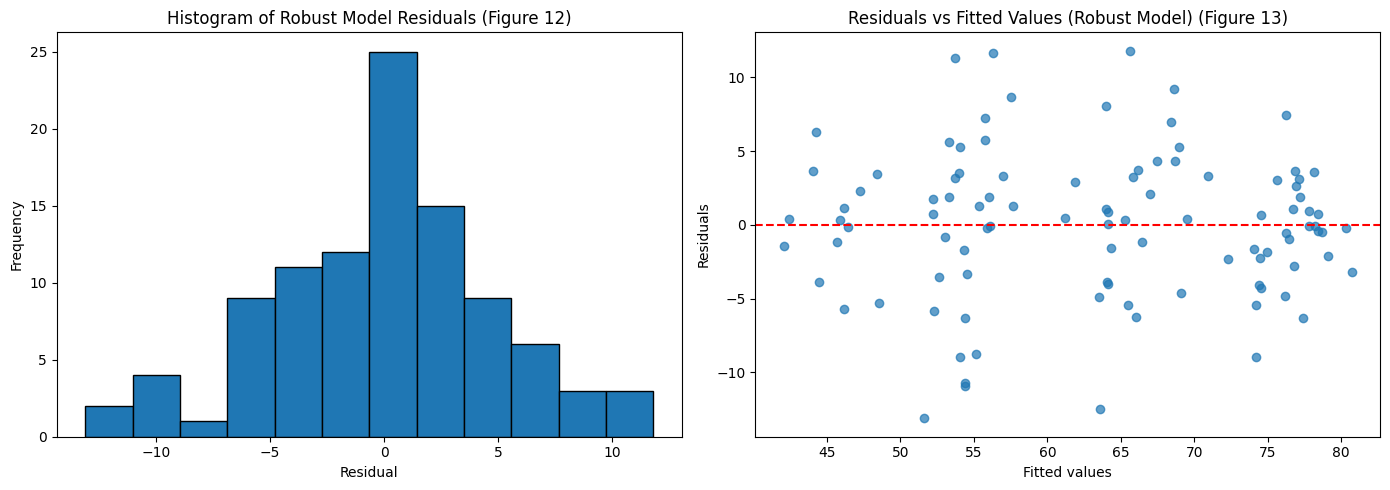

Shapiro-Wilk test: Statistic=0.9864, p-value=0.3986
Residuals appear normally distributed.
Lagrange multiplier statistic: 16.1889
p-value: 0.0234
f-value: 2.5387
f p-value: 0.0196
Heteroscedasticity detected (non-constant variance).


In [62]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Extract residuals and fitted values from the robust model
residuals = robust_model.resid
fitted_vals = robust_model.fittedvalues

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals (Figure 12)
axes[0].hist(residuals, bins=12, edgecolor='black')
axes[0].set_title('Histogram of Robust Model Residuals (Figure 12)')
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Frequency')

# Residuals vs Fitted Values plot (Figure 13)
axes[1].scatter(fitted_vals, residuals, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Fitted Values (Robust Model) (Figure 13)')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
# Save the figure for inclusion in Appendix A
plt.savefig('residual_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

# Shapiro-Wilk Normality Test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Residuals appear normally distributed.")
else:
    print("Residuals do not appear normally distributed.")

# Breusch-Pagan Test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, robust_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')
if bp_test[1] < 0.05:
    print("Heteroscedasticity detected (non-constant variance).")
else:
    print("No evidence of heteroscedasticity (homoscedastic residuals).")